<a href="https://colab.research.google.com/github/lhandley1/Penguin-Classification-using-KNN-and-Naive-Bayes/blob/main/classification_evaluation_KNN_Naive_Bayes_with_palmerpenguins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Penguin Species Classification using KNN and Naive Bayes

This notebook evaulates the effectiveness of classifying penguin species using K-Nearest Neighbors (KNN) VS Naive Bayes algorithms. It includes data loading, cleaning, visualisation, model training (with and without cross-validation), hyperparameter tuning, and evaluation using confusion matrices, precision, recall, F1-score, ROC curves, and AUC. Additionally, the notebook explores the impact of Principal Component Analysis (PCA) on the performance of these models.

# Installing necessary packages

In [ ]:
#Installing necessary packages for the penguins dataset and to clean the data
install.packages("palmerpenguins")
install.packages("tidyverse")
#Installing necessary packages for KNN
install.packages("ucimlr")
install.packages("caret")
install.packages("class")
install.packages("e1071")
install.packages("ggplot2")
install.packages("pROC")
#Installing the necessary packages for Naive Bayes
install.packages("naivebayes", dependencies = TRUE)
install.packages("e1071", dependencies = TRUE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘ucimlr’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing pac

# Setting up penguin dataset

Load all of the libaries straight away

Finds names of the packages that were just downloaded to the library

In [ ]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [ ]:
library(palmerpenguins)

Accesses the penguin dataset from the palmerpenguins library

In [ ]:
data(penguins)

Displays all of the names for the different kind of data and their types

In [ ]:
str(penguins)

tibble [344 × 8] (S3: tbl_df/tbl/data.frame)
 $ species          : Factor w/ 3 levels "Adelie","Chinstrap",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ island           : Factor w/ 3 levels "Biscoe","Dream",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ bill_length_mm   : num [1:344] 39.1 39.5 40.3 NA 36.7 39.3 38.9 39.2 34.1 42 ...
 $ bill_depth_mm    : num [1:344] 18.7 17.4 18 NA 19.3 20.6 17.8 19.6 18.1 20.2 ...
 $ flipper_length_mm: int [1:344] 181 186 195 NA 193 190 181 195 193 190 ...
 $ body_mass_g      : int [1:344] 3750 3800 3250 NA 3450 3650 3625 4675 3475 4250 ...
 $ sex              : Factor w/ 2 levels "female","male": 2 1 1 NA 1 2 1 2 NA NA ...
 $ year             : int [1:344] 2007 2007 2007 2007 2007 2007 2007 2007 2007 2007 ...


Writes a new csv file with all the dataset in colomns

In [ ]:
write.csv(penguins, 'penguins.csv')

# Data summaries and graph visualisation

Outputs a list of all the colomns

In [ ]:
penguins %>%
    names()

[1] "species"           "island"            "bill_length_mm"   
[4] "bill_depth_mm"     "flipper_length_mm" "body_mass_g"      
[7] "sex"               "year"

Displays the whole csv file in a table

In [ ]:
penguins

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>
Adelie,Torgersen,39.1,18.7,181,3750,male,2007
Adelie,Torgersen,39.5,17.4,186,3800,female,2007
Adelie,Torgersen,40.3,18.0,195,3250,female,2007
Adelie,Torgersen,NA,NA,NA,NA,NA,2007
Adelie,Torgersen,36.7,19.3,193,3450,female,2007
Adelie,Torgersen,39.3,20.6,190,3650,male,2007
Adelie,Torgersen,38.9,17.8,181,3625,female,2007
Adelie,Torgersen,39.2,19.6,195,4675,male,2007
Adelie,Torgersen,34.1,18.1,193,3475,NA,2007


Displays the first few rows of the dataset

In [ ]:
head(penguins)

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>
Adelie,Torgersen,39.1,18.7,181,3750,male,2007
Adelie,Torgersen,39.5,17.4,186,3800,female,2007
Adelie,Torgersen,40.3,18.0,195,3250,female,2007
Adelie,Torgersen,NA,NA,NA,NA,NA,2007
Adelie,Torgersen,36.7,19.3,193,3450,female,2007
Adelie,Torgersen,39.3,20.6,190,3650,male,2007


The total number of rows and colomns and the first couple of values for each row

In [ ]:
glimpse(penguins)

Rows: 344
Columns: 8
$ species           <fct> Adelie, Adelie, Adelie, Adelie, Adelie, Adelie, Adel…
$ island            <fct> Torgersen, Torgersen, Torgersen, Torgersen, Torgerse…
$ bill_length_mm    <dbl> 39.1, 39.5, 40.3, NA, 36.7, 39.3, 38.9, 39.2, 34.1, …
$ bill_depth_mm     <dbl> 18.7, 17.4, 18.0, NA, 19.3, 20.6, 17.8, 19.6, 18.1, …
$ flipper_length_mm <int> 181, 186, 195, NA, 193, 190, 181, 195, 193, 190, 186…
$ body_mass_g       <int> 3750, 3800, 3250, NA, 3450, 3650, 3625, 4675, 3475, …
$ sex               <fct> male, female, female, NA, female, male, female, male…
$ year              <int> 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007…


Totals for different catergories and min, max, medium and mean values for integer datasets

In [ ]:
summary(penguins)

      species          island    bill_length_mm  bill_depth_mm  
 Adelie   :152   Biscoe   :168   Min.   :32.10   Min.   :13.10  
 Chinstrap: 68   Dream    :124   1st Qu.:39.23   1st Qu.:15.60  
 Gentoo   :124   Torgersen: 52   Median :44.45   Median :17.30  
                                 Mean   :43.92   Mean   :17.15  
                                 3rd Qu.:48.50   3rd Qu.:18.70  
                                 Max.   :59.60   Max.   :21.50  
                                 NA's   :2       NA's   :2      
 flipper_length_mm  body_mass_g       sex           year     
 Min.   :172.0     Min.   :2700   female:165   Min.   :2007  
 1st Qu.:190.0     1st Qu.:3550   male  :168   1st Qu.:2007  
 Median :197.0     Median :4050   NA's  : 11   Median :2008  
 Mean   :200.9     Mean   :4202                Mean   :2008  
 3rd Qu.:213.0     3rd Qu.:4750                3rd Qu.:2009  
 Max.   :231.0     Max.   :6300                Max.   :2009  
 NA's   :2         NA's   :2                  

The total number of penguins for each species

In [ ]:
count(penguins, species)

species,n
<fct>,<int>
Adelie,152
Chinstrap,68
Gentoo,124


Check the distribution of the data values with the weight attribute

In [ ]:
table(penguins$body_mass_g)


2700 2850 2900 2925 2975 3000 3050 3075 3100 3150 3175 3200 3250 3275 3300 3325 
   1    2    4    1    1    2    4    1    1    4    2    5    5    1    6    5 
3350 3400 3425 3450 3475 3500 3525 3550 3575 3600 3625 3650 3675 3700 3725 3750 
   5    8    2    8    3    7    2    9    1    7    1    6    2   11    3    5 
3775 3800 3825 3850 3875 3900 3950 3975 4000 4050 4075 4100 4150 4200 4250 4275 
   4   12    1    1    1   10   10    1    5    6    1    5    6    5    5    1 
4300 4350 4375 4400 4450 4475 4500 4550 4575 4600 4625 4650 4675 4700 4725 4750 
   8    2    1    8    5    1    3    2    1    5    2    5    1    6    3    5 
4775 4800 4850 4875 4900 4925 4950 4975 5000 5050 5100 5150 5200 5250 5300 5350 
   1    3    4    3    2    2    2    1    6    3    3    2    4    3    4    3 
5400 5450 5500 5550 5600 5650 5700 5750 5800 5850 5950 6000 6050 6300 
   5    1    5    6    2    3    5    1    2    3    2    2    1    1 

# Removing missing values

Check if there is any missing in the dataset
- NA stands for not available
- NaN stands for impossible value e.g. dividing by zero

In [ ]:
#Check for missing values in all the features
print("Missing values in features: ")
sum(is.na(penguins))

#Check for missing values in the target (species)
print("Missing values in target: ")
sum(is.na(penguins$species))

[1] "Missing values in features: "


[1] 19

[1] "Missing values in target: "


[1] 0

Removing missing values and removing unnecessary features

In [ ]:
# Creates a new dataset with the missing data removed
cleanpenguins <- na.omit(penguins)
#Remove island, sex and year because they don't directly determine the species type features they are not all continous values
cleanpenguins <- subset(cleanpenguins, select = -c(island, sex, year))
cleanpenguins$species <- as.factor(cleanpenguins$species)

In [ ]:
#The total amount of rows and the total number of features
dim(cleanpenguins)
# Displays the new dataset
cleanpenguins

[1] 333   5

species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
<fct>,<dbl>,<dbl>,<int>,<int>
Adelie,39.1,18.7,181,3750
Adelie,39.5,17.4,186,3800
Adelie,40.3,18.0,195,3250
Adelie,36.7,19.3,193,3450
Adelie,39.3,20.6,190,3650
Adelie,38.9,17.8,181,3625
Adelie,39.2,19.6,195,4675
Adelie,41.1,17.6,182,3200
Adelie,38.6,21.2,191,3800


**Visualisation of the features**

n
<int>
333


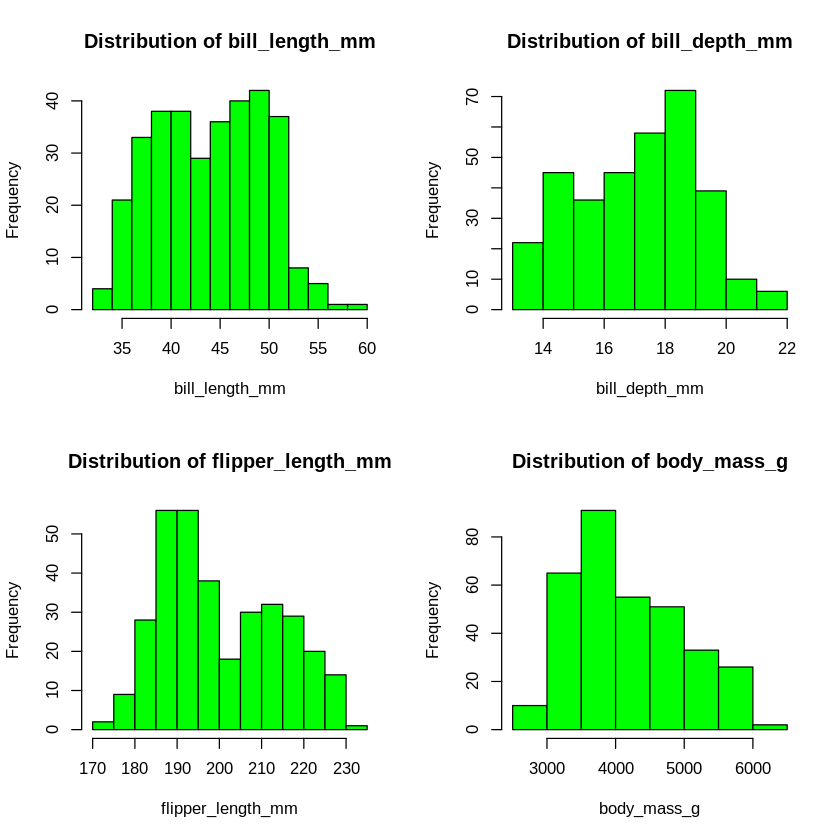

In [ ]:
features_subset <- subset(cleanpenguins, select = -c(species))

#Number of features
count(features_subset)

features <- colnames(features_subset)[-ncol(cleanpenguins)]
total_features <- length(features)

par(mfrow=c(2, 2))

for (feature in features) {
  hist(cleanpenguins[[feature]], main=paste("Distribution of", feature), xlab=feature, col="green", breaks=10)
}

# Load the libraries for KNN and Naive Bayes

In [ ]:
#Loading libraries
library(readr)
library(caret) #For train-test ratio assigning
library(class) #KNN library
library(scales) #For normalisation
library(ggplot2) #For plotting
library(pROC) # For plotting the ROC curve
library(naivebayes)
library(e1071)

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift



Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor


Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var


naivebayes 1.0.0 loaded

For more information please visit: 

https://majkamichal.github.io/naivebayes/



# KNN (without CV)

Best k value: 1 
Best Accuracy: 1 


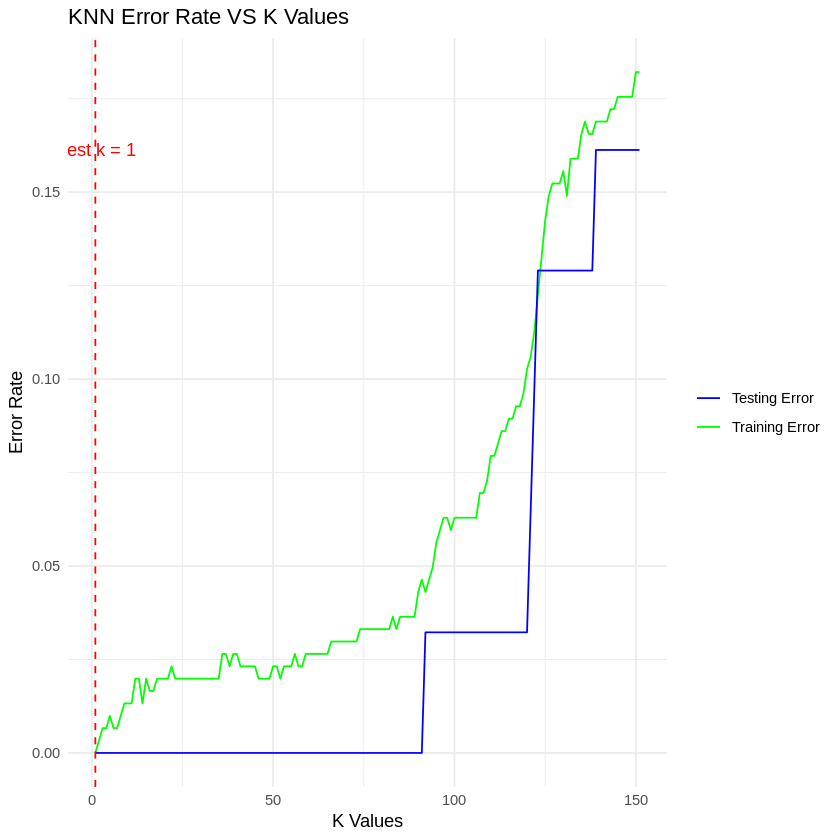

In [ ]:
#Setting the randomness
set.seed(123)

#The different splitting ratios for the dataset
#10 train : 90 test
training_ratio <- createDataPartition(cleanpenguins$species, p=0.9, list=FALSE)

#20 train : 80 test
#training_ratio <- createDataPartition(cleanpenguins$species, p=0.8, list = FALSE)

#30 train : 70 test
#training_ratio <- createDataPartition(cleanpenguins$species, p=0.7, list=FALSE)

#40 train : 60 test
#training_ratio <- createDataPartition(cleanpenguins$species, p=0.6, list=FALSE)

#50 train: 50 test
#training_ratio <- createDataPartition(cleanpenguins$species, p=0.5, list=FALSE)

#60 train: 40 test
#training_ratio <- createDataPartition(cleanpenguins$species, p=0.4, list = FALSE)

#70 train: 30 test
#training_ratio <- createDataPartition(cleanpenguins$species, p=0.3, list=FALSE)

#80 train : 20 test
#training_ratio <- createDataPartition(cleanpenguins$species, p=0.2, list=FALSE)

#90 train : 10 test
#training_ratio <- createDataPartition(cleanpenguins$species, p=0.1, list=FALSE)

#Training with dataset
features_train <- cleanpenguins[training_ratio, ]
#Testing with dataset_
features_test <- cleanpenguins[-training_ratio, ]

#Training with labels
labels_train <- features_train$species
#Testing with labels
labels_test <- features_test$species

#Normalising the features using scaling
#sapply method to ensure that the features are numeric values and are split properly
scale <- preProcess(features_train[, sapply(features_train, is.numeric)], method = c("center", "scale"))
features_train_scaled <- predict(scale, features_train[, sapply(features_train, is.numeric)])
features_test_scaled <- predict(scale, features_test[, sapply(features_test, is.numeric)])

#Initilise the score errors
training_error <- numeric()
testing_error <- numeric()

#Hyperparameters tuning
#Amount of training samples
#Change the calculation to see if this resolves the issue
amount_train_samples <- nrow(features_train_scaled)
#Largest k value
maximum_k <- floor(amount_train_samples / 2)
#The range of k values
k_range <- 1:maximum_k

#Iterate through all the k values
for (k in k_range) {
  #Run KNN model
  KNN_model <- knn(train = features_train_scaled, test = features_train_scaled, cl = labels_train, k = k)

  #Determining the training error
  #Average training error
  avg_train_error = mean(KNN_model != labels_train)
  #Storing the training error rate
  training_error = c(training_error, avg_train_error)

  #Determining the testing error
  knn_testing <- knn(train = features_train_scaled, test = features_test_scaled, cl = labels_train, k = k)
  #Average testing error
  avg_test_error = mean(knn_testing != labels_test)
  #Storing the testing error rate
  testing_error = c(testing_error, avg_test_error)
}

#Determining the best value of k by identifying the minimum testing error
best_k_index <- which.min(testing_error)
best_k_value <- k_range[best_k_index] #Storing the best k value
#Determining the best accuracy value
best_acc <- 1 - testing_error[best_k_index]

# Stores all the calculated error results
error_results <- data.frame(k = k_range, train_error = training_error, test_error = testing_error)

# Plot the error curves
ggplot(error_results, aes(x = k)) +
  geom_line(aes(y = train_error, color = "Training Error")) +
  geom_line(aes(y = test_error, color = "Testing Error")) +
  geom_vline(xintercept = best_k_value, color = "red", linetype = "dashed") +
  labs(title = "KNN Error Rate VS K Values",
      x = "K Values", y = "Error Rate") +
  scale_color_manual(values = c("blue", "green")) +
  theme_minimal() +
  theme(legend.title = element_blank()) +
  #Annotating where the best k value is
  annotate("text", x = best_k_value, y = max(testing_error), label= paste("Best k =", best_k_value), color = "red")

#Output the best k value and its accuracy value
cat("Best k value:", best_k_value, "\n")
cat("Best Accuracy:", best_acc, "\n")


**Confusion Matrix for the best k value**

In [ ]:
#Producting the classification predictions on the test dataset of the best k value
knn_testing_predicts <- knn(train = features_train_scaled, test = features_test_scaled, cl = labels_train, k = best_k_value)

#Creating the confusion matrix for the best k value
conf_matrix <- confusionMatrix(table(as.factor(knn_testing_predicts), as.factor(labels_test)))
print(conf_matrix)

Confusion Matrix and Statistics

           
            Adelie Chinstrap Gentoo
  Adelie        14         0      0
  Chinstrap      0         6      0
  Gentoo         0         0     11

Overall Statistics
                                     
               Accuracy : 1          
                 95% CI : (0.8878, 1)
    No Information Rate : 0.4516     
    P-Value [Acc > NIR] : 1.985e-11  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         

Statistics by Class:

                     Class: Adelie Class: Chinstrap Class: Gentoo
Sensitivity                 1.0000           1.0000        1.0000
Specificity                 1.0000           1.0000        1.0000
Pos Pred Value              1.0000           1.0000        1.0000
Neg Pred Value              1.0000           1.0000        1.0000
Prevalence                  0.4516           0.1935        0.3548
Detection Rate              0.

**Precision, Recall and F1 Score for the best k value**





In [ ]:
# Positive and negative metrics for evaluating prediction accuracy
#Getting the true positive, true negative, false positive, false negative from the confusion matrix
true_p <- conf_matrix$table[2, 2]
true_n <- conf_matrix$table[1, 1]
false_p <- conf_matrix$table[1, 2]
false_n <- conf_matrix$table[2, 1]

#Creating a function to reuse to determine the precision, recall and f1 score for each experiment
best_k_metrics <- function(t_positives, t_negatives, f_positives, f_negatives) {
  #Precision calculation
  prec <- ifelse((t_positives + f_positives) > 0,
              t_positives / (t_positives + f_positives),
              0)
  #Recall calculation
  recall <- ifelse((t_positives + f_negatives) > 0,
                t_positives / (t_positives + f_negatives),
                0)
  #F1 score calculation
  f1_score <- ifelse((prec + recall) > 0,
                  2 * (prec * recall) / (prec + recall),
                  0)
  #Outputing the metrics
  cat("Precision:", prec, "\n")
  cat("Recall:", recall, "\n")
  cat("F1 Score:", f1_score, "\n")
}

#Display the precision, recall and f1 score
best_k_metrics(true_p, true_n, false_p, false_n)

Precision: 1 
Recall: 1 
F1 Score: 1 


**ROC Curve and Area under ROC for the best k value**

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] "AUC: 1"


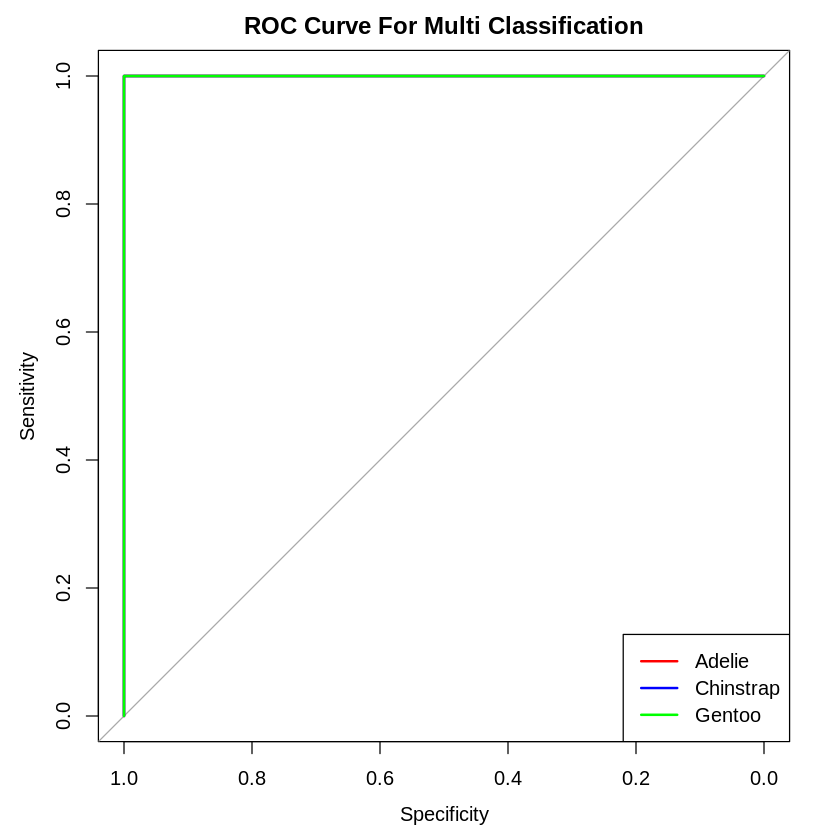

In [ ]:
#Checks to ensure that the best k value is correct
#Y training value having error where it cannot run because it is not a factor
knn_best_k <- knn3(features_train_scaled, as.factor(labels_train), k = best_k_value)

#Predicted probablities for the positive classification
predicts <- predict(knn_best_k, features_test_scaled, type = "prob")

#Stores all the probalities values based on how accurate the predictions are
probablities <- attr(predicts, "probabilities")

#Calculate ROC curve for multiclassification using the One Vs Rest (OvR) Approach
#Each classification is determined as a classification problem
#All of the AUC calculations for each ROC curve
ROC_curves <- list()
#All of the AUC calculations for each ROC curve
AUC_curves <- numeric(0)

for(class in levels(cleanpenguins$species)) {
  #Stores the classification labels
  class_labels <- as.numeric(labels_test == class)
  #Produces the ROC for each classification
  ROC_curve <- roc(class_labels, predicts[, class])
  #Saves the ROC into the ROC curves list
  ROC_curves[[class]] <- ROC_curve
  #Assigns a new AUC calulation to the array
  AUC_curves <- c(AUC_curves, ROC_curve$auc)
}

#Using Macro-averaging to determine the overall AUC performance
avg_auc <- round(mean(AUC_curves), 3)

#Visualising the ROC curve
plot(ROC_curves[[1]], col = "red", main = "ROC Curve For Multi Classification")
lines(ROC_curves[[2]], col = "blue")
lines(ROC_curves[[3]], col = "green")
legend("bottomright", legend = levels(cleanpenguins$species), col = c("red", "blue", "green"), lwd = 2)

#Outputting the AUC (Area Under Curve)
print(paste("AUC:", avg_auc))

# Naive Bayes (without CV)

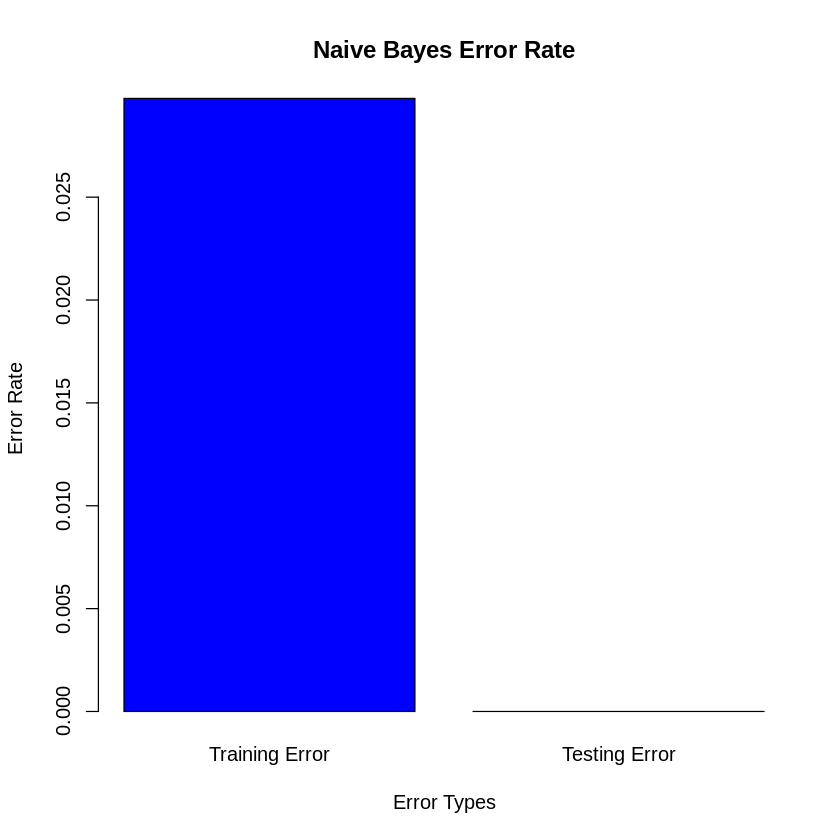

In [ ]:
#Setting the randomness
set.seed(123)

#The different splitting ratios for the dataset
#10 train : 90 test
training_ratio <- createDataPartition(cleanpenguins$species, p=0.9, list=FALSE)

#20 train : 80 test
#training_ratio <- createDataPartition(cleanpenguins$species, p=0.8, list = FALSE)

#30 train : 70 test
#training_ratio <- createDataPartition(cleanpenguins$species, p=0.7, list=FALSE)

#40 train : 60 test
#training_ratio <- createDataPartition(cleanpenguins$species, p=0.6, list=FALSE)

#50 train: 50 test
#training_ratio <- createDataPartition(cleanpenguins$species, p=0.5, list=FALSE)

#60 train: 40 test
#training_ratio <- createDataPartition(cleanpenguins$species, p=0.4, list = FALSE)

#70 train: 30 test
#training_ratio <- createDataPartition(cleanpenguins$species, p=0.3, list=FALSE)

#80 train : 20 test
#training_ratio <- createDataPartition(cleanpenguins$species, p=0.2, list=FALSE)

#90 train : 10 test
#training_ratio <- createDataPartition(cleanpenguins$species, p=0.1, list=FALSE)

#Training with dataset
features_train <- cleanpenguins[training_ratio, ]
#Testing with dataset_
features_test <- cleanpenguins[-training_ratio, ]

#Training with labels
labels_train <- features_train$species
#Testing with labels
labels_test <- features_test$species

#Normalising the features using scaling
#sapply method to ensure that the features are numeric values and are split properly
scale <- preProcess(features_train[, sapply(features_train, is.numeric)], method = c("center", "scale"))
features_train_scaled <- predict(scale, features_train[, sapply(features_train, is.numeric)])
features_test_scaled <- predict(scale, features_test[, sapply(features_test, is.numeric)])

#Initilise the score errors
training_error <- numeric()
testing_error <- numeric()

#Naive Bayes Model training
n_bayes <- naiveBayes(labels_train ~ ., data = features_train_scaled)

#Determining the training error
naive_training <- predict(n_bayes, features_train_scaled, type="class")

#Average training error
avg_train_error = mean(naive_training != labels_train)
#Storing the training error rate
training_error = c(training_error, avg_train_error)

#Determining the testing error
naive_testing <- predict(n_bayes, features_test_scaled, type="class")

#Average testing error
avg_test_error = mean(naive_testing != labels_test)
#Storing the testing error rate
testing_error = c(testing_error, avg_test_error)

# Stores all the calculated error results
error_results <- data.frame(train_error = training_error, test_error = testing_error)

error_rates <- c(error_results$train_error, error_results$test_error)

error_types <- c("Training Error", "Testing Error")

barplot(error_rates, names.arg=error_types,
  xlab="Error Types", ylab="Error Rate",
  col=c("blue", "green"),
  main="Naive Bayes Error Rate")

**Confusion Matrix**

In [ ]:
#Confusion matrix
conf_matrix <- confusionMatrix(factor(naive_testing), factor(labels_test))
print(conf_matrix)

Confusion Matrix and Statistics

           Reference
Prediction  Adelie Chinstrap Gentoo
  Adelie        14         0      0
  Chinstrap      0         6      0
  Gentoo         0         0     11

Overall Statistics
                                     
               Accuracy : 1          
                 95% CI : (0.8878, 1)
    No Information Rate : 0.4516     
    P-Value [Acc > NIR] : 1.985e-11  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         

Statistics by Class:

                     Class: Adelie Class: Chinstrap Class: Gentoo
Sensitivity                 1.0000           1.0000        1.0000
Specificity                 1.0000           1.0000        1.0000
Pos Pred Value              1.0000           1.0000        1.0000
Neg Pred Value              1.0000           1.0000        1.0000
Prevalence                  0.4516           0.1935        0.3548
Detection Rate       

**Precision, Recall and F1 Score**

In [ ]:
# Positive and negative metrics for evaluating prediction accuracy
#Getting the true positive, true negative, false positive, false negative from the confusion matrix
true_p <- conf_matrix$table[2, 2]
true_n <- conf_matrix$table[1, 1]
false_p <- conf_matrix$table[1, 2]
false_n <- conf_matrix$table[2, 1]

best_k_metrics(true_p, true_n, false_p, false_n)

Precision: 1 
Recall: 1 
F1 Score: 1 


**ROC Curve and Area under ROC**

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] "AUC: 1"


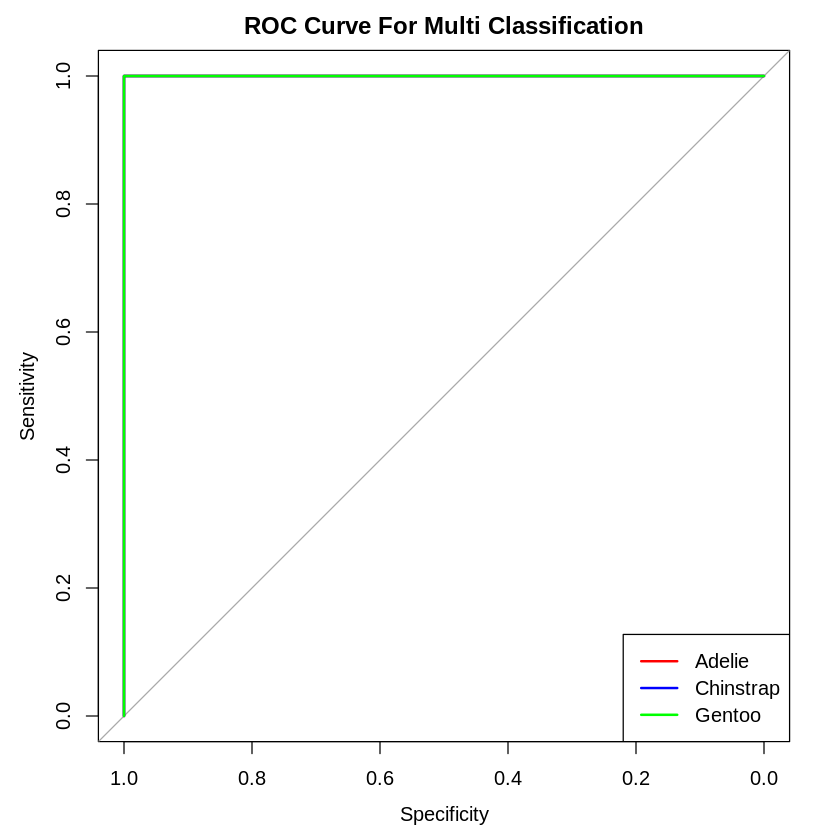

In [ ]:
#Predicted probablities for the positive classification
predicts <- predict(n_bayes, features_test_scaled, type="raw")

#Stores all the probalities values based on how accurate the predictions are
probablities <- attr(predicts, "probabilities")

#Calculate ROC curve for multiclassification using the One Vs Rest (OvR) Approach
#Each classification is determined as a classification problem
#All of the AUC calculations for each ROC curve
ROC_curves <- list()
#All of the AUC calculations for each ROC curve
AUC_curves <- numeric(0)

for(class in levels(cleanpenguins$species)) {
  #Stores the classification labels
  class_labels <- as.numeric(labels_test == class)
  #Produces the ROC for each classification
  ROC_curve <- roc(class_labels, predicts[, class])
  #Saves the ROC into the ROC curves list
  ROC_curves[[class]] <- ROC_curve
  #Assigns a new AUC calulation to the array
  AUC_curves <- c(AUC_curves, ROC_curve$auc)
}

#Using Macro-averaging to determine the overall AUC performance
avg_auc <- round(mean(AUC_curves), 3)

#Visualising the ROC curve
plot(ROC_curves[[1]], col = "red", main = "ROC Curve For Multi Classification")
lines(ROC_curves[[2]], col = "blue")
lines(ROC_curves[[3]], col = "green")
legend("bottomright", legend = levels(cleanpenguins$species), col = c("red", "blue", "green"), lwd = 2)

#Outputting the AUC (Area Under Curve)
print(paste("AUC:", avg_auc))

# KNN (with CV)

function (data = NULL, mapping = aes(), ..., environment = parent.frame()) 
{
    UseMethod("ggplot")
}
<bytecode: 0x5aedfa979418>
<environment: namespace:ggplot2>
Best k value: 3 
Best Accuracy: 0.9933775 


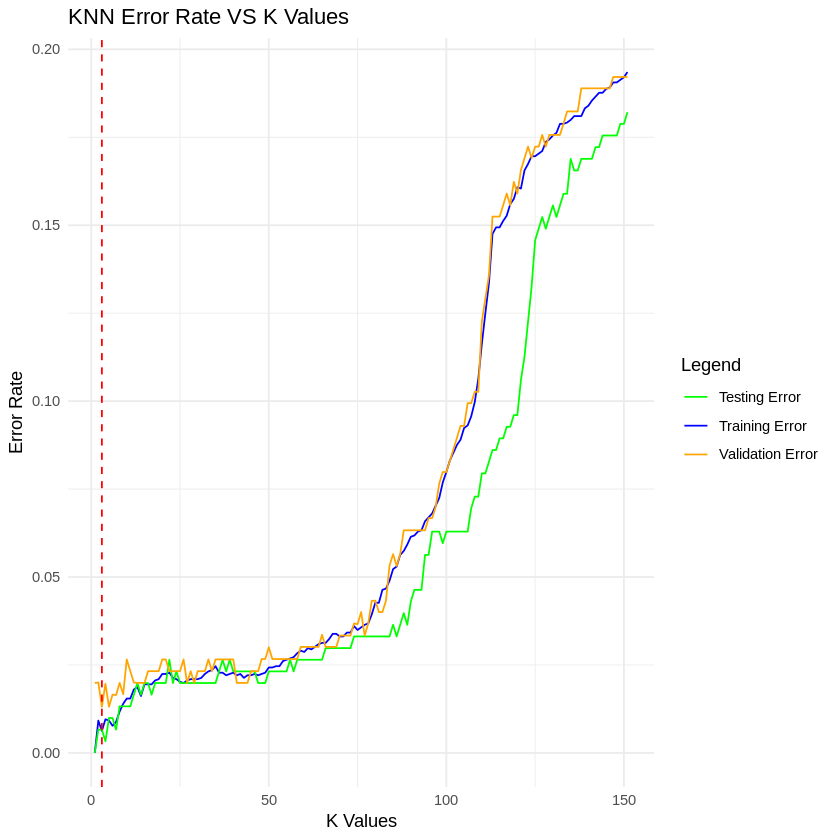

In [ ]:
#Setting the randomness
set.seed(123)

#The different splitting ratios for the dataset
#10 train : 90 test
training_ratio <- createDataPartition(cleanpenguins$species, p=0.9, list=FALSE)

#20 train : 80 test
#training_ratio <- createDataPartition(cleanpenguins$species, p=0.8, list=FALSE)

#30 train : 70 test
#training_ratio <- createDataPartition(cleanpenguins$species, p=0.7, list=FALSE)

#40 train : 60 test
#training_ratio <- createDataPartition(cleanpenguins$species, p=0.6, list=FALSE)

#50 train: 50 test
#training_ratio <- createDataPartition(cleanpenguins$species, p=0.5, list=FALSE)

#60 train: 40 test
#training_ratio <- createDataPartition(cleanpenguins$species, p=0.4, list=FALSE)

#70 train: 30 test
#training_ratio <- createDataPartition(cleanpenguins$species, p=0.3, list=FALSE)

#80 train : 20 test
#training_ratio <- createDataPartition(cleanpenguins$species, p=0.2, list=FALSE)

#90 train : 10 test
#training_ratio <- createDataPartition(cleanpenguins$species, p=0.1, list=FALSE)

#Training with dataset
features_train <- cleanpenguins[training_ratio, ]
#Testing with dataset_
features_test <- cleanpenguins[-training_ratio, ]

#Training with labels
labels_train <- features_train$species
#Testing with labels
labels_test <- features_test$species

#Normalising the features using scaling
scale <- preProcess(features_train[, sapply(features_train, is.numeric)], method = c("center", "scale"))
features_train_scaled <- predict(scale, features_train[, sapply(features_train, is.numeric)])
features_test_scaled <- predict(scale, features_test[, sapply(features_test, is.numeric)])

#Initilise the score errors
KNN_training_error <- c() #Training errors for each k value
KNN_testing_error <- c()  #Testing errors for each k value
KNN_validation_error <- c() #Validation errors for each k value

#Hyperparameters tuning
#Amount of training samples
amount_train_samples <- nrow(features_train_scaled)
#Largest k value
maximum_k <- amount_train_samples %/% 2
#The range of k values
k_range <- 1:maximum_k

#Creating the KFolds for 10 fold validation
k_folds <- createFolds(labels_train, k = 10, list = TRUE)

#Iterate through all the k values
for (k in k_range) {
  #Reset after each iteration of k
  k_folds_train_errors <- c()
  k_folds_validation_errors <- c()

  #Cross validation performed for each fold
  for(fold_num in k_folds) {
    #Assigning the current fold with a portion of the features and label training data
    fold_features_train <- features_train_scaled[-fold_num, ]
    fold_labels_train <- labels_train[-fold_num]
    #Current training value for the features and label data
    feature_value_fold <- features_train_scaled[fold_num, ]
    label_value_fold <- labels_train[fold_num]

    #Train kNN on the current fold iteration
    KNN_predicts <- knn(fold_features_train, feature_value_fold, fold_labels_train, k = k)

    #Determine the training and validation errors
    k_folds_train_errors <- c(k_folds_train_errors, mean(knn(fold_features_train, fold_features_train, fold_labels_train, k = k) != fold_labels_train))
    k_folds_validation_errors <- c(k_folds_validation_errors, mean(KNN_predicts != label_value_fold))
  }

  #Calculate the average error rates for each k value
  KNN_training_error <- c(KNN_training_error, mean(k_folds_train_errors))
  #Determine the testing error after the fitting process of the training set
  KNN_testing_error <- c(KNN_testing_error, mean(knn(features_train_scaled, features_train_scaled, labels_train, k = k) != labels_train))
  KNN_validation_error <- c(KNN_validation_error, mean(k_folds_validation_errors))
}

#Determining the best value of k by identifying the minimum testing error
best_k_index <- which.min(KNN_validation_error) # The k value index with the smallest validation error
best_k_value <- k_range[best_k_index] #Storing the best k value
#Determining the best accuracy value
best_acc <- 1 - KNN_testing_error[best_k_index]

# Plot the error curves
ggplot() +
  geom_line(aes(x = k_range, y = KNN_training_error, color = "Training Error")) +
  geom_line(aes(x = k_range, y = KNN_testing_error, color = "Testing Error")) +
  geom_line(aes(x = k_range, y = KNN_validation_error, color = "Validation Error")) +
  geom_vline(xintercept = best_k_value, , linetype = "dashed", color = "red") +
  labs(x = 'K Values', y = 'Error Rate', title = "KNN Error Rate VS K Values") +
  scale_color_manual(name = "Legend", values = c("Training Error" = "blue", "Testing Error" = "green", "Validation Error" = "orange")) +
  theme_minimal()

#Display the plot
print(ggplot)

#Output the best k value and its accuracy value
cat("Best k value:", best_k_value, "\n")
cat("Best Accuracy:", best_acc, "\n")

**Confusion Matrix for the besk k value**

In [ ]:
#Classification predictions for the best k value
knn_testing_predicts_cv <- knn(features_train_scaled, features_test_scaled, labels_train, k = best_k_value)

#Confusion matrix for the best k value
conf_matrix <- confusionMatrix(factor(knn_testing_predicts_cv), factor(labels_test))
print(conf_matrix)

Confusion Matrix and Statistics

           Reference
Prediction  Adelie Chinstrap Gentoo
  Adelie        14         0      0
  Chinstrap      0         6      0
  Gentoo         0         0     11

Overall Statistics
                                     
               Accuracy : 1          
                 95% CI : (0.8878, 1)
    No Information Rate : 0.4516     
    P-Value [Acc > NIR] : 1.985e-11  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         

Statistics by Class:

                     Class: Adelie Class: Chinstrap Class: Gentoo
Sensitivity                 1.0000           1.0000        1.0000
Specificity                 1.0000           1.0000        1.0000
Pos Pred Value              1.0000           1.0000        1.0000
Neg Pred Value              1.0000           1.0000        1.0000
Prevalence                  0.4516           0.1935        0.3548
Detection Rate       

**Precision, Recall and F1 Score for the best k value**

In [ ]:
#Getting the true positive, true negative, false positive, false negative from the confusion matrix
true_p <- conf_matrix$table[2, 2]
true_n <- conf_matrix$table[1, 1]
false_p <- conf_matrix$table[1, 2]
false_n <- conf_matrix$table[2, 1]

#Display the precision, recall and F1 score for KNN with CV for the best k value
best_k_metrics(true_p, true_n, false_p, false_n)

Precision: 1 
Recall: 1 
F1 Score: 1 


**ROC Curve and Area under ROC for the best k value**

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] "AUC: 1"


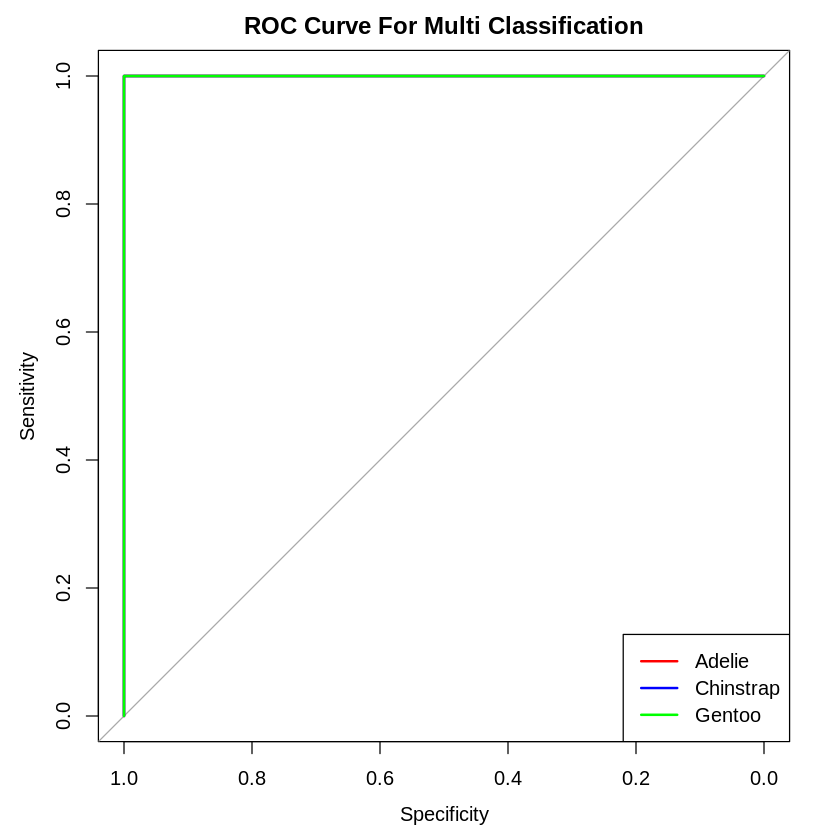

In [ ]:
#Checks to ensure that the best k value is correct
#Y training value having error where it cannot run because it is not a factor
knn_best_k <- knn3(features_train_scaled, as.factor(labels_train), k = best_k_value)

#Predicted probablities for the positive classification
predicts <- predict(knn_best_k, features_test_scaled, type = "prob")

#Stores all the probalities values based on how accurate the predictions are
probablities <- attr(predicts, "probabilities")

#Calculate ROC curve for multiclassification using the One Vs Rest (OvR) Approach
#Each classification is determined as a classification problem
#All of the AUC calculations for each ROC curve
ROC_curves <- list()
#All of the AUC calculations for each ROC curve
AUC_curves <- numeric(0)

for(class in levels(cleanpenguins$species)) {
  #Stores the classification labels
  class_labels <- as.numeric(labels_test == class)
  #Produces the ROC for each classification
  ROC_curve <- roc(class_labels, predicts[, class])
  #Saves the ROC into the ROC curves list
  ROC_curves[[class]] <- ROC_curve
  #Assigns a new AUC calulation to the array
  AUC_curves <- c(AUC_curves, ROC_curve$auc)
}

#Using Macro-averaging to determine the overall AUC performance
avg_auc <- round(mean(AUC_curves), 3)

#Visualising the ROC curve
plot(ROC_curves[[1]], col = "red", main = "ROC Curve For Multi Classification")
lines(ROC_curves[[2]], col = "blue")
lines(ROC_curves[[3]], col = "green")
legend("bottomright", legend = levels(cleanpenguins$species), col = c("red", "blue", "green"), lwd = 2)

#Outputting the AUC (Area Under Curve)
print(paste("AUC:", avg_auc))

# Naive Bayes (with CV)

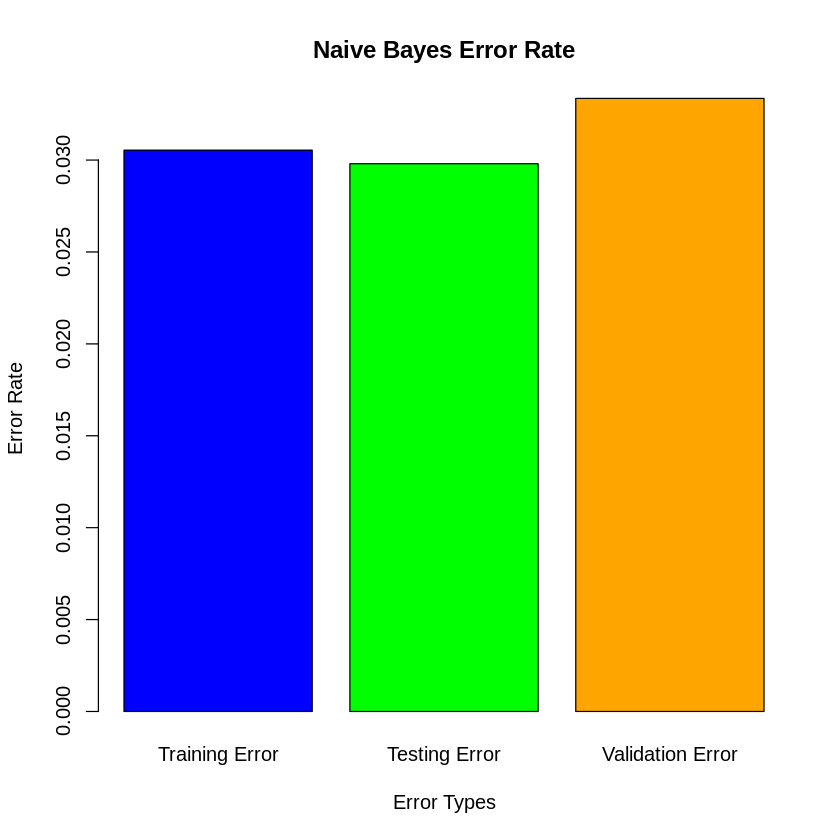

In [ ]:
#Setting the randomness
set.seed(123)

#The different splitting ratios for the dataset
#10 train : 90 test
training_ratio <- createDataPartition(cleanpenguins$species, p=0.9, list=FALSE)

#20 train : 80 test
#training_ratio <- createDataPartition(cleanpenguins$species, p=0.8, list=FALSE)

#30 train : 70 test
#training_ratio <- createDataPartition(cleanpenguins$species, p=0.7, list=FALSE)

#40 train : 60 test
#training_ratio <- createDataPartition(cleanpenguins$species, p=0.6, list=FALSE)

#50 train: 50 test
#training_ratio <- createDataPartition(cleanpenguins$species, p=0.5, list=FALSE)

#60 train: 40 test
#training_ratio <- createDataPartition(cleanpenguins$species, p=0.4, list=FALSE)

#70 train: 30 test
#training_ratio <- createDataPartition(cleanpenguins$species, p=0.3, list=FALSE)

#80 train : 20 test
#training_ratio <- createDataPartition(cleanpenguins$species, p=0.2, list=FALSE)

#90 train : 10 test
#training_ratio <- createDataPartition(cleanpenguins$species, p=0.1, list=FALSE)

#Training with dataset
features_train <- cleanpenguins[training_ratio, ]
#Testing with dataset_
features_test <- cleanpenguins[-training_ratio, ]

#Training with labels
labels_train <- features_train$species
#Testing with labels
labels_test <- features_test$species

#Normalising the features using scaling
scale <- preProcess(features_train[, sapply(features_train, is.numeric)], method = c("center", "scale"))
features_train_scaled <- predict(scale, features_train[, sapply(features_train, is.numeric)])
features_test_scaled <- predict(scale, features_test[, sapply(features_test, is.numeric)])

#Initilise the score errors
naive_training_error <- c() #Training errors for each k value
naive_testing_error <- c()  #Testing errors for each k value
naive_validation_error <- c() #Validation errors for each k value

#Creating the KFolds for 10 fold validation
k_folds <- createFolds(labels_train, k = 10, list = TRUE)

k_folds_train_errors <- c()
k_folds_validation_errors <- c()

#Cross validation performed for each fold
for(fold_num in k_folds) {
    #Assigning the current fold with a portion of the features and label training data
    fold_features_train <- features_train_scaled[-fold_num, ]
    fold_labels_train <- labels_train[-fold_num]
    #Current training value for the features and label data
    feature_value_fold <- features_train_scaled[fold_num, ]
    label_value_fold <- labels_train[fold_num]

    #Naive Bayes Model training
    n_bayes_predicts <- naiveBayes(fold_labels_train ~ ., data = fold_features_train)

    #New validation data beening introduced for each iteration that needs to be evaulated to determine the validation error
    predicted_labels <- predict(n_bayes_predicts, newdata = as.data.frame(feature_value_fold), type="class")

    #Determine the training and validation errors
    k_folds_train_errors <- c(k_folds_train_errors, mean(predict(n_bayes_predicts, fold_features_train, type="class") != fold_labels_train))
    k_folds_validation_errors <- c(k_folds_validation_errors, mean(predicted_labels != label_value_fold))
  }

#Calculate the average error rates for each k value
naive_training_error <- c(naive_training_error, mean(k_folds_train_errors))
#Determine the testing error after the fitting process of the training set
naive_testing_error <- c(naive_testing_error, mean(predict(n_bayes, features_train_scaled, type="class") != labels_train))
naive_validation_error <- c(naive_validation_error, mean(k_folds_validation_errors))

#Naive Bayes Bar Chart
# Stores all the calculated error results
error_results <- data.frame(train_error = naive_training_error, test_error = naive_testing_error, val_error = naive_validation_error)

error_rates <- c(error_results$train_error, error_results$test_error, error_results$val_error)

error_types <- c("Training Error", "Testing Error", "Validation Error")

barplot(error_rates, names.arg=error_types,
  xlab="Error Types", ylab="Error Rate",
  col=c("blue", "green", "orange"),
  main="Naive Bayes Error Rate")


**Confusion Matrix**

In [ ]:
#Evaluation for confusion matrix
n_bayes <- naiveBayes(fold_labels_train ~ ., data = fold_features_train)

naive_predicts <- predict(n_bayes, features_test_scaled, type="class")

#Confusion matrix
conf_matrix <- confusionMatrix(factor(naive_predicts), factor(labels_test))
print(conf_matrix)

Confusion Matrix and Statistics

           Reference
Prediction  Adelie Chinstrap Gentoo
  Adelie        14         0      0
  Chinstrap      0         6      0
  Gentoo         0         0     11

Overall Statistics
                                     
               Accuracy : 1          
                 95% CI : (0.8878, 1)
    No Information Rate : 0.4516     
    P-Value [Acc > NIR] : 1.985e-11  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         

Statistics by Class:

                     Class: Adelie Class: Chinstrap Class: Gentoo
Sensitivity                 1.0000           1.0000        1.0000
Specificity                 1.0000           1.0000        1.0000
Pos Pred Value              1.0000           1.0000        1.0000
Neg Pred Value              1.0000           1.0000        1.0000
Prevalence                  0.4516           0.1935        0.3548
Detection Rate       

**Precision, Recall and F1 Score**

In [ ]:
#Getting the true positive, true negative, false positive, false negative from the confusion matrix
true_p <- conf_matrix$table[2, 2]
true_n <- conf_matrix$table[1, 1]
false_p <- conf_matrix$table[1, 2]
false_n <- conf_matrix$table[2, 1]

#Display the precision, recall and F1 score for KNN with CV for the best k value
best_k_metrics(true_p, true_n, false_p, false_n)

Precision: 1 
Recall: 1 
F1 Score: 1 


**ROC Curve and Area under ROC**

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] "AUC: 1"


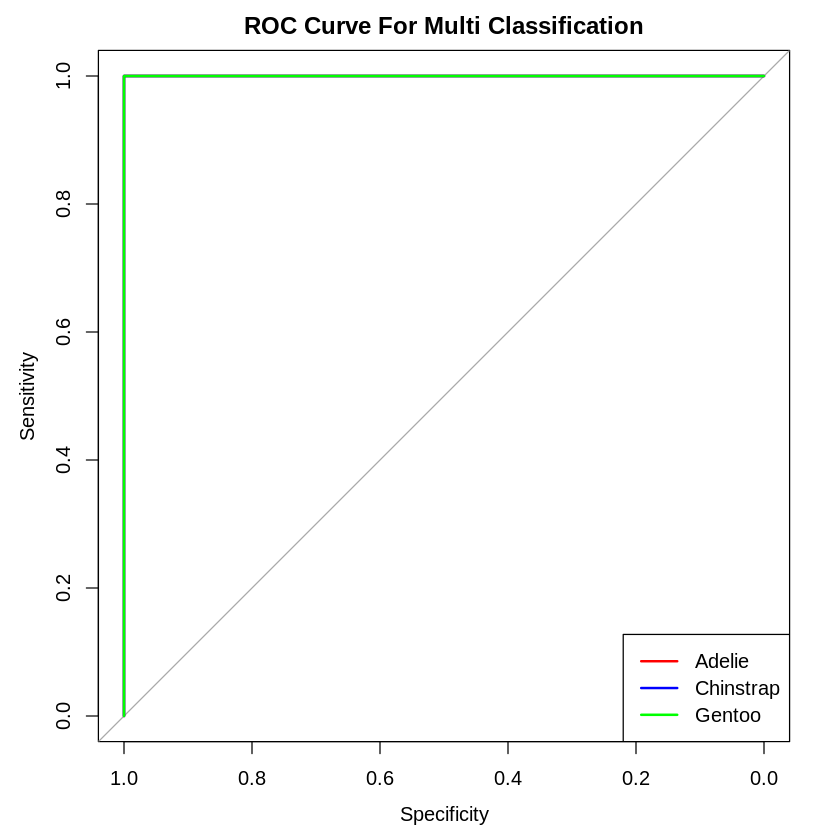

In [ ]:
#Predicted probablities for the positive classification
predicts <- predict(n_bayes, features_test_scaled, type="raw")

#Stores all the probalities values based on how accurate the predictions are
probablities <- attr(predicts, "probabilities")

#Calculate ROC curve for multiclassification using the One Vs Rest (OvR) Approach
#Each classification is determined as a classification problem
#All of the AUC calculations for each ROC curve
ROC_curves <- list()
#All of the AUC calculations for each ROC curve
AUC_curves <- numeric(0)

for(class in levels(cleanpenguins$species)) {
  #Stores the classification labels
  class_labels <- as.numeric(labels_test == class)
  #Produces the ROC for each classification
  ROC_curve <- roc(class_labels, predicts[, class])
  #Saves the ROC into the ROC curves list
  ROC_curves[[class]] <- ROC_curve
  #Assigns a new AUC calulation to the array
  AUC_curves <- c(AUC_curves, ROC_curve$auc)
}

#Using Macro-averaging to determine the overall AUC performance
avg_auc <- round(mean(AUC_curves), 3)

#Visualising the ROC curve
plot(ROC_curves[[1]], col = "red", main = "ROC Curve For Multi Classification")
lines(ROC_curves[[2]], col = "blue")
lines(ROC_curves[[3]], col = "green")
legend("bottomright", legend = levels(cleanpenguins$species), col = c("red", "blue", "green"), lwd = 2)

#Outputting the AUC (Area Under Curve)
print(paste("AUC:", avg_auc))

# Principal Component Analysis (PCA) investigation

The Cattell's Rule will be used here to review the variance between the components on the bar chart.

This rule states choosing the components with the most significant components, usually on the bar chart's left side. This is known as the variance data on the left side of the knee. The other data with minimal change from each other doesn't provide minimal extra information for classification. Therefore, they have minimal contribution.




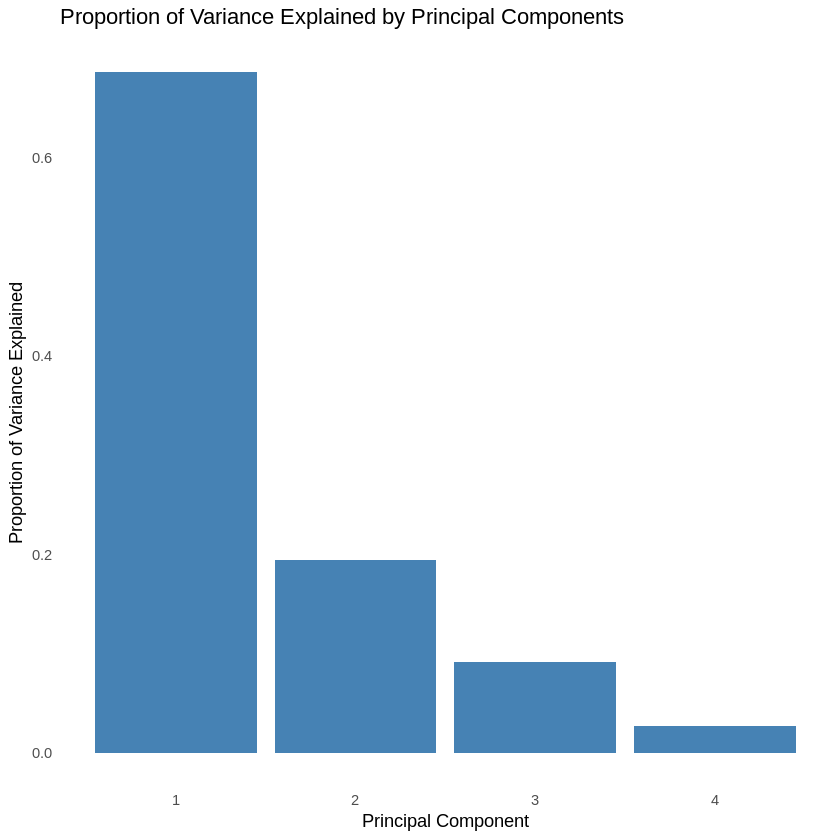

In [ ]:
#All the features without the species colomn
features <- cleanpenguins[, -which(names(cleanpenguins) == "species")]
#All of the classification labels for the species colomn
labels <- cleanpenguins$species #Target variable

# Normalising the features with standardisation
scale <- preProcess(features, method = c("center", "scale"))
features_scaled <- predict(scale, features)

# Perfom PCA
pca_outcome <- prcomp(features_scaled, center = TRUE, scale. = TRUE)

#Determine the proportion of variance summary for each principal component
variances_summaries <- summary(pca_outcome)$importance[2, ] #Row 2 provides the proportion of variance

#Store the data required for the bar chart in a data frame
pca_bar_data <- data.frame(
  principal_component = 1:length(variances_summaries),
  variance_explained = variances_summaries
)

ggplot(pca_bar_data, aes(x = principal_component, y = variance_explained)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  labs(x = 'Principal Component',
      y = 'Proportion of Variance Explained',
      title = 'Proportion of Variance Explained by Principal Components') +
  theme_minimal() +
  scale_x_continuous(breaks = 1:length(variances_summaries)) +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())

# KNN (with CV) with PCA

function (data = NULL, mapping = aes(), ..., environment = parent.frame()) 
{
    UseMethod("ggplot")
}
<bytecode: 0x5aedfa979418>
<environment: namespace:ggplot2>
Best k value: 48 
Best Accuracy: 0.8907285 


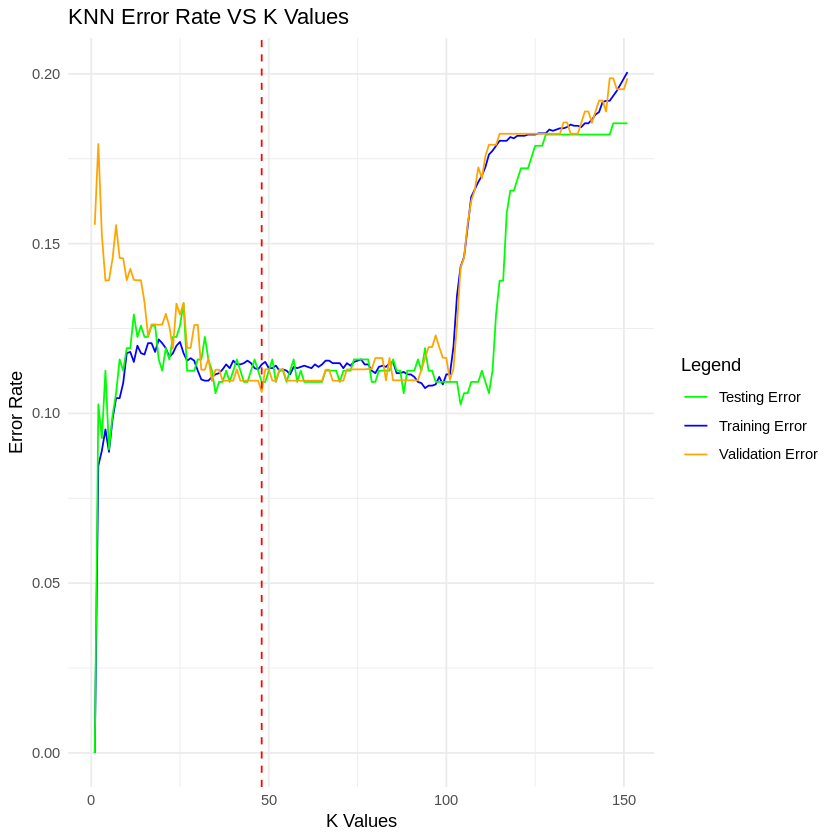

In [ ]:
#Setting the randomness
set.seed(123)

#The different splitting ratios for the dataset
#10 train : 90 test
training_ratio <- createDataPartition(cleanpenguins$species, p=0.9, list=FALSE)

#20 train : 80 test
#training_ratio <- createDataPartition(cleanpenguins$species, p=0.8, list=FALSE)

#30 train : 70 test
#training_ratio <- createDataPartition(cleanpenguins$species, p=0.7, list=FALSE)

#40 train : 60 test
#training_ratio <- createDataPartition(cleanpenguins$species, p=0.6, list=FALSE)

#50 train: 50 test
#training_ratio <- createDataPartition(cleanpenguins$species, p=0.5, list=FALSE)

#60 train: 40 test
#training_ratio <- createDataPartition(cleanpenguins$species, p=0.4, list=FALSE)

#70 train: 30 test
#training_ratio <- createDataPartition(cleanpenguins$species, p=0.3, list=FALSE)

#80 train : 20 test
#training_ratio <- createDataPartition(cleanpenguins$species, p=0.2, list=FALSE)

#90 train : 10 test
#training_ratio <- createDataPartition(cleanpenguins$species, p=0.1, list=FALSE)

#Training with dataset
features_train <- cleanpenguins[training_ratio, ]
#Testing with dataset_
features_test <- cleanpenguins[-training_ratio, ]

#Training with labels
labels_train <- features_train$species
#Testing with labels
labels_test <- features_test$species

#Normalising the features using scaling
scale <- preProcess(features_train[, sapply(features_train, is.numeric)], method = c("center", "scale"))
features_train_scaled <- predict(scale, features_train[, sapply(features_train, is.numeric)])
features_test_scaled <- predict(scale, features_test[, sapply(features_test, is.numeric)])

#Perform PCA
pca_outcome <- prcomp(features_train_scaled, center = TRUE, scale. = TRUE)

#Collect the variance summary and cumulative variance (total variance)
variance_summary <- pca_outcome$sdev^2
variance_summary_ratio <- variance_summary / sum(variance_summary)
cumulative_variance <- cumsum(variance_summary_ratio)

#The number of principal components (PC's) to maintain (Based on Catell's Rule)
num_pcs_maintained <- 2

#New data frames to store the testing and training data for the selected PC's
features_train_pca <- as.data.frame(pca_outcome$x[, 1:num_pcs_maintained])
features_test_pca <- as.data.frame(predict(pca_outcome, newdata = features_test_scaled)[, 1:num_pcs_maintained])

#Initilise the score errors
KNN_training_error <- c() #Training errors for each k value
KNN_testing_error <- c()  #Testing errors for each k value
KNN_validation_error <- c() #Validation errors for each k value

#Hyperparameters tuning
#Amount of training samples
amount_train_samples <- nrow(features_train_pca)
#Largest k value
maximum_k <- amount_train_samples %/% 2
#The range of k values
k_range <- 1:maximum_k

#Creating the KFolds for 10 fold validation
k_folds <- createFolds(labels_train, k = 10, list = TRUE)

#Iterate through all the k values
for (k in k_range) {
  #Reset after each iteration of k
  k_folds_train_errors <- c()
  k_folds_validation_errors <- c()

  #Cross validation performed for each fold
  for(fold_num in k_folds) {
    #Assigning the current fold with a portion of the features and label training data
    fold_features_train <- features_train_pca[-fold_num, ]
    fold_labels_train <- labels_train[-fold_num]
    #Current training value for the features and label data
    feature_value_fold <- features_train_pca[fold_num, ]
    label_value_fold <- labels_train[fold_num]

    #Train kNN on the current fold iteration
    KNN_predicts <- knn(fold_features_train, feature_value_fold, fold_labels_train, k = k)

    #Determine the training and validation errors
    k_folds_train_errors <- c(k_folds_train_errors, mean(knn(fold_features_train, fold_features_train, fold_labels_train, k = k) != fold_labels_train))
    k_folds_validation_errors <- c(k_folds_validation_errors, mean(KNN_predicts != label_value_fold))
  }

  #Calculate the average error rates for each k value
  KNN_training_error <- c(KNN_training_error, mean(k_folds_train_errors))
  #Determine the testing error after the fitting process of the training set
  KNN_testing_error <- c(KNN_testing_error, mean(knn(features_train_pca, features_train_pca, labels_train, k = k) != labels_train))
  KNN_validation_error <- c(KNN_validation_error, mean(k_folds_validation_errors))
}

#Determining the best value of k by identifying the minimum testing error
best_k_index <- which.min(KNN_validation_error) # The k value index with the smallest validation error
best_k_value <- k_range[best_k_index] #Storing the best k value
#Determining the best accuracy value
best_acc <- 1 - KNN_testing_error[best_k_index]

# Plot the error curves
ggplot() +
  geom_line(aes(x = k_range, y = KNN_training_error, color = "Training Error")) +
  geom_line(aes(x = k_range, y = KNN_testing_error, color = "Testing Error")) +
  geom_line(aes(x = k_range, y = KNN_validation_error, color = "Validation Error")) +
  geom_vline(xintercept = best_k_value, , linetype = "dashed", color = "red") +
  labs(x = 'K Values', y = 'Error Rate', title = "KNN Error Rate VS K Values") +
  scale_color_manual(name = "Legend", values = c("Training Error" = "blue", "Testing Error" = "green", "Validation Error" = "orange")) +
  theme_minimal()

#Display the plot
print(ggplot)

#Output the best k value and its accuracy value
cat("Best k value:", best_k_value, "\n")
cat("Best Accuracy:", best_acc, "\n")

**Confusion matrix for the best k value**

In [ ]:
#Classification predictions for the best k value
knn_testing_predicts_cv <- knn(features_train_pca, features_test_pca, labels_train, k = best_k_value)

#Confusion matrix for the best k value
conf_matrix <- confusionMatrix(factor(knn_testing_predicts_cv), factor(labels_test))
print(conf_matrix)

Confusion Matrix and Statistics

           Reference
Prediction  Adelie Chinstrap Gentoo
  Adelie        14         1      0
  Chinstrap      0         5      0
  Gentoo         0         0     11

Overall Statistics
                                         
               Accuracy : 0.9677         
                 95% CI : (0.833, 0.9992)
    No Information Rate : 0.4516         
    P-Value [Acc > NIR] : 7.671e-10      
                                         
                  Kappa : 0.9483         
                                         
 Mcnemar's Test P-Value : NA             

Statistics by Class:

                     Class: Adelie Class: Chinstrap Class: Gentoo
Sensitivity                 1.0000           0.8333        1.0000
Specificity                 0.9412           1.0000        1.0000
Pos Pred Value              0.9333           1.0000        1.0000
Neg Pred Value              1.0000           0.9615        1.0000
Prevalence                  0.4516           0.1935

**Precision, Recall and F1 Score for the best k value**

In [ ]:
#Getting the true positive, true negative, false positive, false negative from the confusion matrix
true_p <- conf_matrix$table[2, 2]
true_n <- conf_matrix$table[1, 1]
false_p <- conf_matrix$table[1, 2]
false_n <- conf_matrix$table[2, 1]

#Display the precision, recall and F1 score for KNN with CV for the best k value
best_k_metrics(true_p, true_n, false_p, false_n)

Precision: 0.8333333 
Recall: 1 
F1 Score: 0.9090909 


**ROC Curve and Area under ROC for the best k value**

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] "AUC: 0.996"


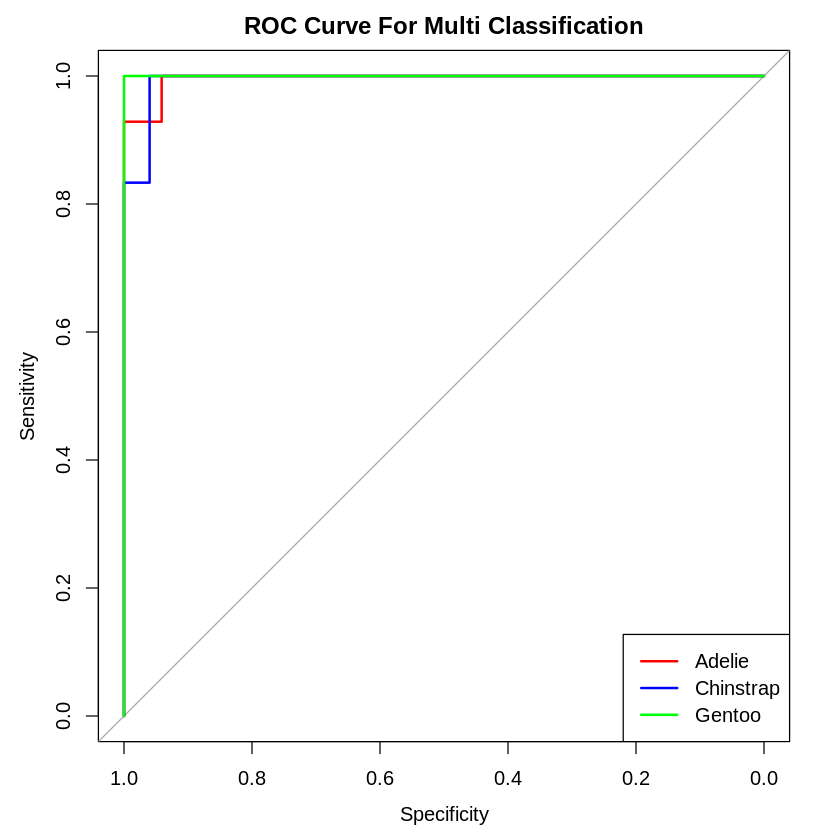

In [ ]:
#Checks to ensure that the best k value is correct
#Y training value having error where it cannot run because it is not a factor
knn_best_k <- knn3(features_train_pca, as.factor(labels_train), k = best_k_value)

#Predicted probablities for the positive classification
predicts <- predict(knn_best_k, features_test_pca, type = "prob")

#Stores all the probalities values based on how accurate the predictions are
probablities <- attr(predicts, "probabilities")

#Calculate ROC curve for multiclassification using the One Vs Rest (OvR) Approach
#Each classification is determined as a classification problem
#All of the AUC calculations for each ROC curve
ROC_curves <- list()
#All of the AUC calculations for each ROC curve
AUC_curves <- numeric(0)

for(class in levels(cleanpenguins$species)) {
  #Stores the classification labels
  class_labels <- as.numeric(labels_test == class)
  #Produces the ROC for each classification
  ROC_curve <- roc(class_labels, predicts[, class])
  #Saves the ROC into the ROC curves list
  ROC_curves[[class]] <- ROC_curve
  #Assigns a new AUC calulation to the array
  AUC_curves <- c(AUC_curves, ROC_curve$auc)
}

#Using Macro-averaging to determine the overall AUC performance
avg_auc <- round(mean(AUC_curves), 3)

#Visualising the ROC curve
plot(ROC_curves[[1]], col = "red", main = "ROC Curve For Multi Classification")
lines(ROC_curves[[2]], col = "blue")
lines(ROC_curves[[3]], col = "green")
legend("bottomright", legend = levels(cleanpenguins$species), col = c("red", "blue", "green"), lwd = 2)

#Outputting the AUC (Area Under Curve)
print(paste("AUC:", avg_auc))

# Naive Bayes (with CV) with PCA

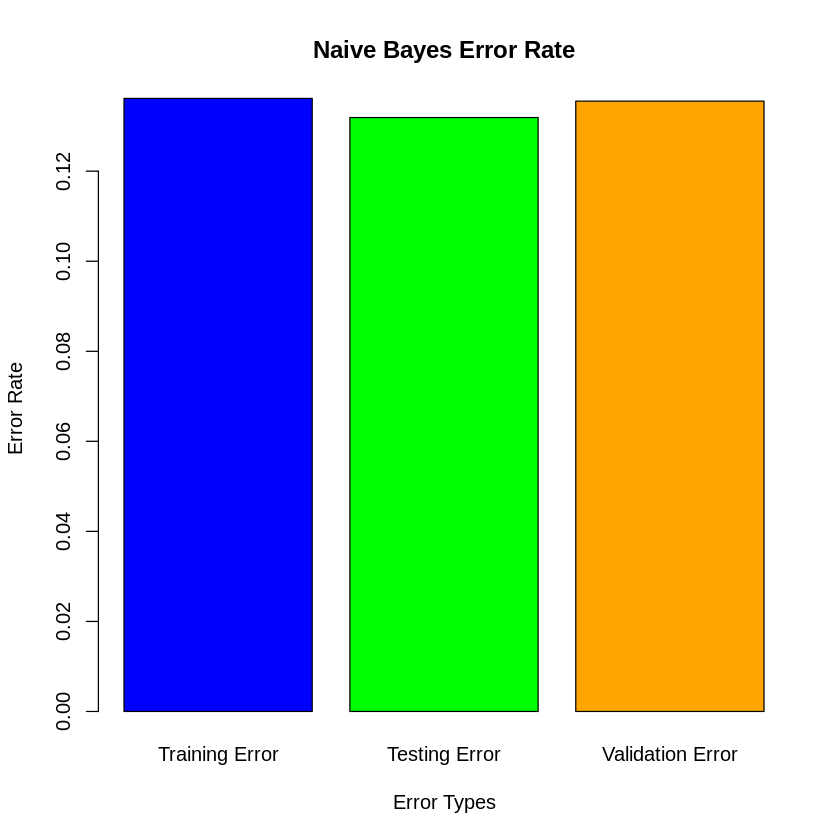

In [ ]:
##Setting the randomness
set.seed(123)

#The different splitting ratios for the dataset
#10 train : 90 test
#training_ratio <- createDataPartition(cleanpenguins$species, p=0.9, list=FALSE)

#20 train : 80 test
#training_ratio <- createDataPartition(cleanpenguins$species, p=0.8, list=FALSE)

#30 train : 70 test
training_ratio <- createDataPartition(cleanpenguins$species, p=0.7, list=FALSE)

#40 train : 60 test
#training_ratio <- createDataPartition(cleanpenguins$species, p=0.6, list=FALSE)

#50 train: 50 test
#training_ratio <- createDataPartition(cleanpenguins$species, p=0.5, list=FALSE)

#60 train: 40 test
#training_ratio <- createDataPartition(cleanpenguins$species, p=0.4, list=FALSE)

#70 train: 30 test
#training_ratio <- createDataPartition(cleanpenguins$species, p=0.3, list=FALSE)

#80 train : 20 test
#training_ratio <- createDataPartition(cleanpenguins$species, p=0.2, list=FALSE)

#90 train : 10 test
#training_ratio <- createDataPartition(cleanpenguins$species, p=0.1, list=FALSE)

#Training with dataset
features_train <- cleanpenguins[training_ratio, ]
#Testing with dataset_
features_test <- cleanpenguins[-training_ratio, ]

#Training with labels
labels_train <- features_train$species
#Testing with labels
labels_test <- features_test$species

#Normalising the features using scaling
scale <- preProcess(features_train[, sapply(features_train, is.numeric)], method = c("center", "scale"))
features_train_scaled <- predict(scale, features_train[, sapply(features_train, is.numeric)])
features_test_scaled <- predict(scale, features_test[, sapply(features_test, is.numeric)])

#Perform PCA
pca_outcome <- prcomp(features_train_scaled, center = TRUE, scale. = TRUE)

#Collect the variance summary and cumulative variance (total variance)
variance_summary <- pca_outcome$sdev^2
variance_summary_ratio <- variance_summary / sum(variance_summary)
cumulative_variance <- cumsum(variance_summary_ratio)

#The number of principal components (PC's) to maintain (Based on Catell's Rule)
num_pcs_maintained <- 2

#New data frames to store the testing and training data for the selected PC's
features_train_pca <- as.data.frame(pca_outcome$x[, 1:num_pcs_maintained])
features_test_pca <- as.data.frame(predict(pca_outcome, newdata = features_test_scaled)[, 1:num_pcs_maintained])

#Initilise the score errors
naive_training_error <- c() #Training errors for each k value
naive_testing_error <- c()  #Testing errors for each k value
naive_validation_error <- c() #Validation errors for each k value

#Creating the KFolds for 10 fold validation
k_folds <- createFolds(labels_train, k = 10, list = TRUE)

k_folds_train_errors <- c()
k_folds_validation_errors <- c()

#Cross validation performed for each fold
for(fold_num in k_folds) {
    #Assigning the current fold with a portion of the features and label training data
    fold_features_train <- features_train_pca[-fold_num, ]
    fold_labels_train <- labels_train[-fold_num]
    #Current training value for the features and label data
    feature_value_fold <- features_train_pca[fold_num, ]
    label_value_fold <- labels_train[fold_num]

    #Naive Bayes Model training
    n_bayes_predicts <- naiveBayes(fold_labels_train ~ ., data = fold_features_train)

    #New validation data beening introduced for each iteration that needs to be evaulated to determine the validation error
    predicted_labels <- predict(n_bayes_predicts, newdata = as.data.frame(feature_value_fold), type="class")

    #Determine the training and validation errors
    k_folds_train_errors <- c(k_folds_train_errors, mean(predict(n_bayes_predicts, fold_features_train, type="class") != fold_labels_train))
    k_folds_validation_errors <- c(k_folds_validation_errors, mean(predicted_labels != label_value_fold))
}

#Calculate the average error rates for each k value
naive_training_error <- c(naive_training_error, mean(k_folds_train_errors))
#Determine the testing error after the fitting process of the training set
naive_testing_error <- c(naive_testing_error, mean(predict(n_bayes, features_train_pca, type="class") != labels_train))
naive_validation_error <- c(naive_validation_error, mean(k_folds_validation_errors))

#Naive Bayes Bar Chart
# Stores all the calculated error results
error_results <- data.frame(train_error = naive_training_error, test_error = naive_testing_error, val_error = naive_validation_error)

error_rates <- c(error_results$train_error, error_results$test_error, error_results$val_error)

error_types <- c("Training Error", "Testing Error", "Validation Error")

barplot(error_rates, names.arg=error_types,
  xlab="Error Types", ylab="Error Rate",
  col=c("blue", "green", "orange"),
  main="Naive Bayes Error Rate")

**Confusion Matrix**

In [ ]:
#Evaluation for confusion matrix
n_bayes <- naiveBayes(labels_train ~ ., data = features_train_pca)

naive_predicts <- predict(n_bayes, features_test_pca, type="class")

#Confusion matrix
conf_matrix <- confusionMatrix(factor(naive_predicts), factor(labels_test))
print(conf_matrix)

Confusion Matrix and Statistics

           Reference
Prediction  Adelie Chinstrap Gentoo
  Adelie        40         2      0
  Chinstrap      3        18      0
  Gentoo         0         0     35

Overall Statistics
                                          
               Accuracy : 0.949           
                 95% CI : (0.8849, 0.9832)
    No Information Rate : 0.4388          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9204          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: Adelie Class: Chinstrap Class: Gentoo
Sensitivity                 0.9302           0.9000        1.0000
Specificity                 0.9636           0.9615        1.0000
Pos Pred Value              0.9524           0.8571        1.0000
Neg Pred Value              0.9464           0.9740        1.0000
Prevalence                  0.4388        

**Precision, Recall and F1 Score**

In [ ]:
#Getting the true positive, true negative, false positive, false negative from the confusion matrix
true_p <- conf_matrix$table[2, 2]
true_n <- conf_matrix$table[1, 1]
false_p <- conf_matrix$table[1, 2]
false_n <- conf_matrix$table[2, 1]

#Display the precision, recall and F1 score for KNN with CV for the best k value
best_k_metrics(true_p, true_n, false_p, false_n)

Precision: 0.9 
Recall: 0.8571429 
F1 Score: 0.8780488 


**ROC Curve and Area under ROC**

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] "AUC: 0.992"


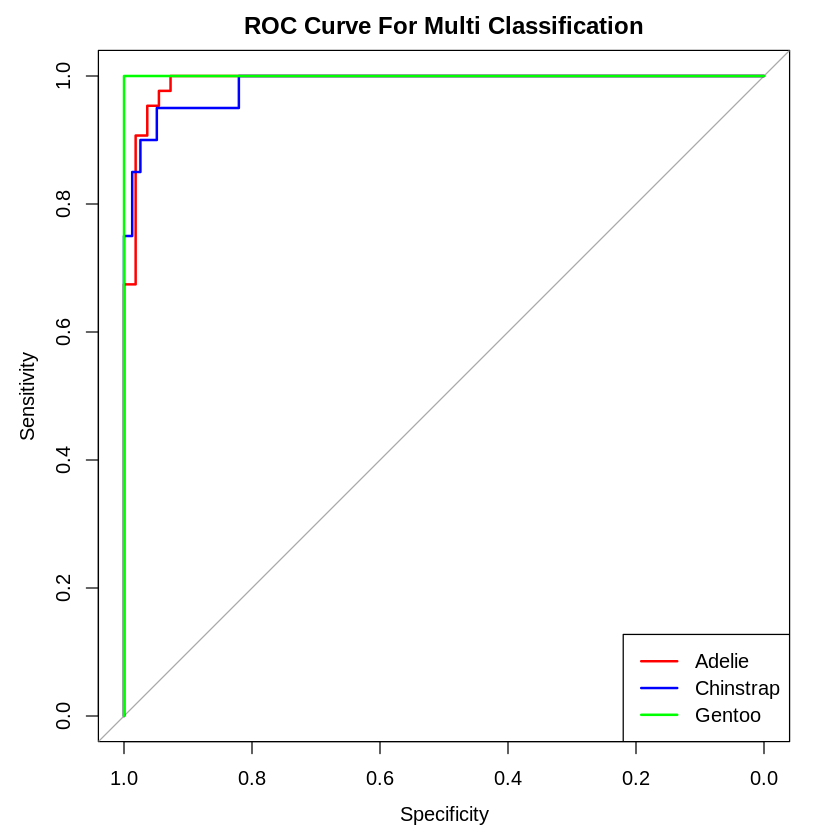

In [ ]:
#Predicted probablities for the positive classification
predicts <- predict(n_bayes, features_test_pca, type="raw")

#Stores all the probalities values based on how accurate the predictions are
probablities <- attr(predicts, "probabilities")

#Calculate ROC curve for multiclassification using the One Vs Rest (OvR) Approach
#Each classification is determined as a classification problem
#All of the AUC calculations for each ROC curve
ROC_curves <- list()
#All of the AUC calculations for each ROC curve
AUC_curves <- numeric(0)

for(class in levels(cleanpenguins$species)) {
  #Stores the classification labels
  class_labels <- as.numeric(labels_test == class)
  #Produces the ROC for each classification
  ROC_curve <- roc(class_labels, predicts[, class])
  #Saves the ROC into the ROC curves list
  ROC_curves[[class]] <- ROC_curve
  #Assigns a new AUC calulation to the array
  AUC_curves <- c(AUC_curves, ROC_curve$auc)
}

#Using Macro-averaging to determine the overall AUC performance
avg_auc <- round(mean(AUC_curves), 3)

#Visualising the ROC curve
plot(ROC_curves[[1]], col = "red", main = "ROC Curve For Multi Classification")
lines(ROC_curves[[2]], col = "blue")
lines(ROC_curves[[3]], col = "green")
legend("bottomright", legend = levels(cleanpenguins$species), col = c("red", "blue", "green"), lwd = 2)

#Outputting the AUC (Area Under Curve)
print(paste("AUC:", avg_auc))

# KNN (without CV) with PCA



Best k value: 15 
Best Accuracy: 1 


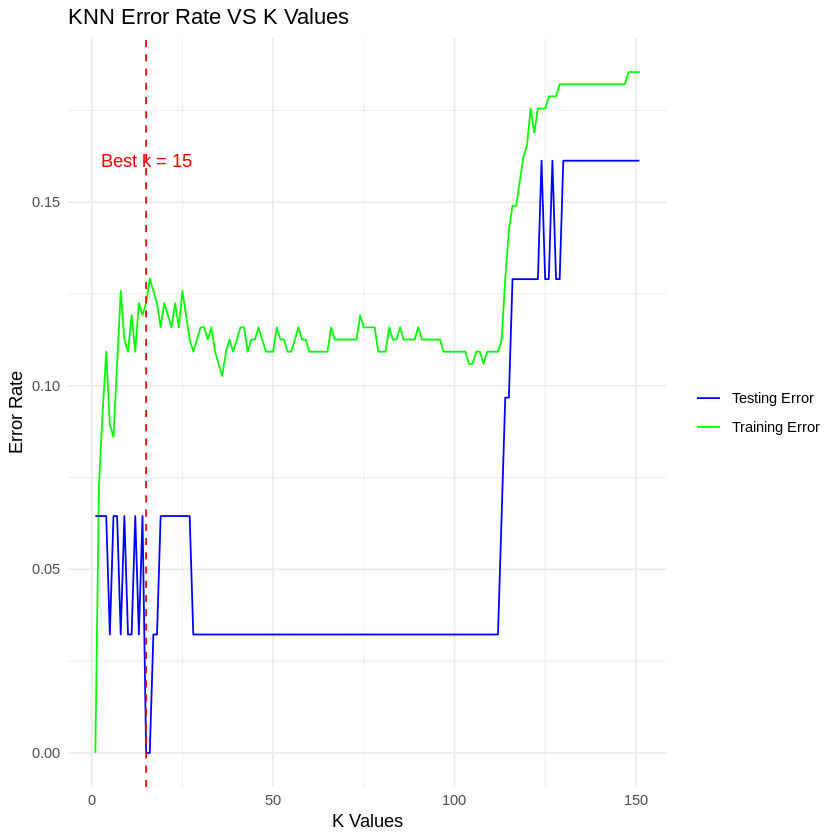

In [ ]:
#Setting the randomness
set.seed(123)

#The different splitting ratios for the dataset
#10 train : 90 test
training_ratio <- createDataPartition(cleanpenguins$species, p=0.9, list=FALSE)

#20 train : 80 test
#training_ratio <- createDataPartition(cleanpenguins$species, p=0.8, list=FALSE)

#30 train : 70 test
#training_ratio <- createDataPartition(cleanpenguins$species, p=0.7, list=FALSE)

#40 train : 60 test
#training_ratio <- createDataPartition(cleanpenguins$species, p=0.6, list=FALSE)

#50 train: 50 test
#training_ratio <- createDataPartition(cleanpenguins$species, p=0.5, list=FALSE)

#60 train: 40 test
#training_ratio <- createDataPartition(cleanpenguins$species, p=0.4, list=FALSE)

#70 train: 30 test
#training_ratio <- createDataPartition(cleanpenguins$species, p=0.3, list=FALSE)

#80 train : 20 test
#training_ratio <- createDataPartition(cleanpenguins$species, p=0.2, list=FALSE)

#90 train : 10 test
#training_ratio <- createDataPartition(cleanpenguins$species, p=0.1, list=FALSE)

#Training with dataset
features_train <- cleanpenguins[training_ratio, ]
#Testing with dataset_
features_test <- cleanpenguins[-training_ratio, ]

#Training with labels
labels_train <- features_train$species
#Testing with labels
labels_test <- features_test$species

#Normalising the features using scaling
scale <- preProcess(features_train[, sapply(features_train, is.numeric)], method = c("center", "scale"))
features_train_scaled <- predict(scale, features_train[, sapply(features_train, is.numeric)])
features_test_scaled <- predict(scale, features_test[, sapply(features_test, is.numeric)])

#Perform PCA
pca_outcome <- prcomp(features_train_scaled, center = TRUE, scale. = TRUE)

#Collect the variance summary and cumulative variance (total variance)
variance_summary <- pca_outcome$sdev^2
variance_summary_ratio <- variance_summary / sum(variance_summary)
cumulative_variance <- cumsum(variance_summary_ratio)

#The number of principal components (PC's) to maintain (Based on Catell's Rule)
num_pcs_maintained <- 2

#New data frames to store the testing and training data for the selected PC's
features_train_pca <- as.data.frame(pca_outcome$x[, 1:num_pcs_maintained])
features_test_pca <- as.data.frame(predict(pca_outcome, newdata = features_test_scaled)[, 1:num_pcs_maintained])

#Initilise the score errors
training_error <- numeric()
testing_error <- numeric()

#Hyperparameters tuning
#Amount of training samples
amount_train_samples <- nrow(features_train_pca) #Training samples reduced because there is now only two features
#Largest k value
maximum_k <- amount_train_samples %/% 2
#The range of k values
k_range <- 1:maximum_k

#Iterate through all the k values
for (k in k_range) {
  #Run KNN model
  KNN_model <- knn(train = features_train_pca, test = features_train_pca, cl = labels_train, k = k)

  #Determining the training error
  #Average training error
  avg_train_error = mean(KNN_model != labels_train)
  #Storing the training error rate
  training_error = c(training_error, avg_train_error)

  #Determining the testing error
  knn_testing <- knn(train = features_train_pca, test = features_test_pca, cl = labels_train, k = k)
  #Average testing error
  avg_test_error = mean(knn_testing != labels_test)
  #Storing the testing error rate
  testing_error = c(testing_error, avg_test_error)
}

#Determining the best value of k by identifying the minimum testing error
best_k_index <- which.min(testing_error)
best_k_value <- k_range[best_k_index] #Storing the best k value
#Determining the best accuracy value
best_acc <- 1 - testing_error[best_k_index]

# Stores all the calculated error results
error_results <- data.frame(k = k_range, train_error = training_error, test_error = testing_error)

# Plot the error curves
ggplot(error_results, aes(x = k)) +
  geom_line(aes(y = train_error, color = "Training Error")) +
  geom_line(aes(y = test_error, color = "Testing Error")) +
  geom_vline(xintercept = best_k_value, color = "red", linetype = "dashed") +
  labs(title = "KNN Error Rate VS K Values",
      x = "K Values", y = "Error Rate") +
  scale_color_manual(values = c("blue", "green")) +
  theme_minimal() +
  theme(legend.title = element_blank()) +
  #Annotating where the best k value is
  annotate("text", x = best_k_value, y = max(testing_error), label= paste("Best k =", best_k_value), color = "red")

#Output the best k value and its accuracy value
cat("Best k value:", best_k_value, "\n")
cat("Best Accuracy:", best_acc, "\n")

**Confusion matrix for the best k value**

In [ ]:
#Producting the classification predictions on the test dataset of the best k value
knn_testing_predicts <- knn(train = features_train_pca, test = features_test_pca, cl = labels_train, k = best_k_value)

#Creating the confusion matrix for the best k value
conf_matrix <- confusionMatrix(table(as.factor(knn_testing_predicts), as.factor(labels_test)))
print(conf_matrix)

Confusion Matrix and Statistics

           
            Adelie Chinstrap Gentoo
  Adelie        14         0      0
  Chinstrap      0         6      0
  Gentoo         0         0     11

Overall Statistics
                                     
               Accuracy : 1          
                 95% CI : (0.8878, 1)
    No Information Rate : 0.4516     
    P-Value [Acc > NIR] : 1.985e-11  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         

Statistics by Class:

                     Class: Adelie Class: Chinstrap Class: Gentoo
Sensitivity                 1.0000           1.0000        1.0000
Specificity                 1.0000           1.0000        1.0000
Pos Pred Value              1.0000           1.0000        1.0000
Neg Pred Value              1.0000           1.0000        1.0000
Prevalence                  0.4516           0.1935        0.3548
Detection Rate              0.

**Precision, Recall and F1 Score for the best k value**

In [ ]:
#Getting the true positive, true negative, false positive, false negative from the confusion matrix
true_p <- conf_matrix$table[2, 2]
true_n <- conf_matrix$table[1, 1]
false_p <- conf_matrix$table[1, 2]
false_n <- conf_matrix$table[2, 1]

#Display the precision, recall and F1 score for KNN with CV for the best k value
best_k_metrics(true_p, true_n, false_p, false_n)

Precision: 1 
Recall: 1 
F1 Score: 1 


**ROC Curve and Area under ROC for the best k value**

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] "AUC: 1"


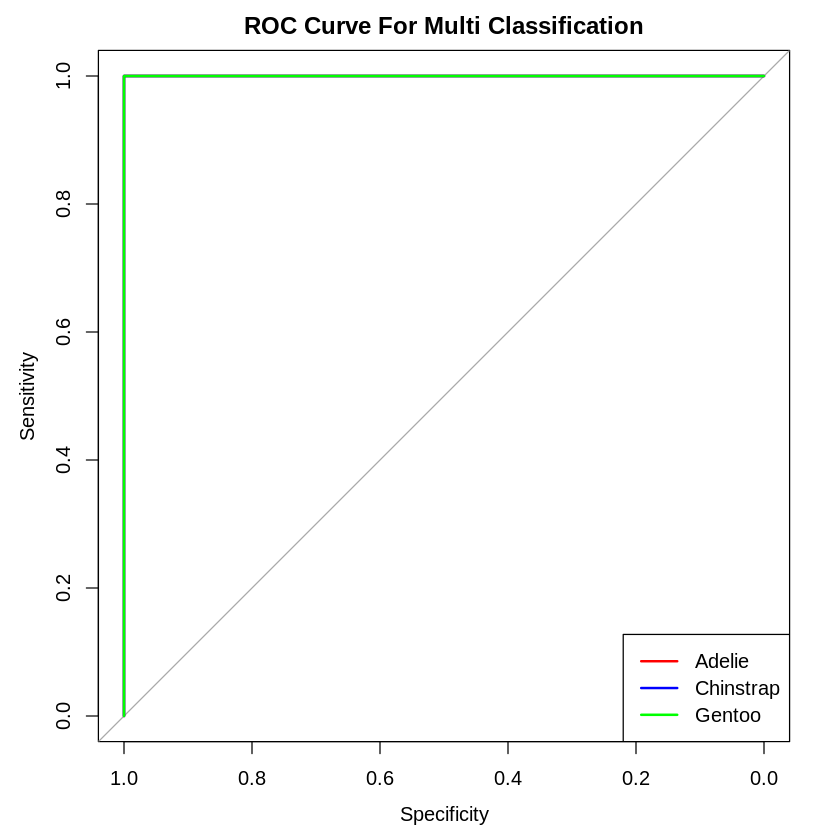

In [ ]:
#Checks to ensure that the best k value is correct
#Y training value having error where it cannot run because it is not a factor
knn_best_k <- knn3(features_train_pca, as.factor(labels_train), k = best_k_value)

#Predicted probablities for the positive classification
predicts <- predict(knn_best_k, features_test_pca, type = "prob")

#Stores all the probalities values based on how accurate the predictions are
probablities <- attr(predicts, "probabilities")

#Calculate ROC curve for multiclassification using the One Vs Rest (OvR) Approach
#Each classification is determined as a classification problem
#All of the AUC calculations for each ROC curve
ROC_curves <- list()
#All of the AUC calculations for each ROC curve
AUC_curves <- numeric(0)

for(class in levels(cleanpenguins$species)) {
  #Stores the classification labels
  class_labels <- as.numeric(labels_test == class)
  #Produces the ROC for each classification
  ROC_curve <- roc(class_labels, predicts[, class])
  #Saves the ROC into the ROC curves list
  ROC_curves[[class]] <- ROC_curve
  #Assigns a new AUC calulation to the array
  AUC_curves <- c(AUC_curves, ROC_curve$auc)
}

#Using Macro-averaging to determine the overall AUC performance
avg_auc <- round(mean(AUC_curves), 3)

#Visualising the ROC curve
plot(ROC_curves[[1]], col = "red", main = "ROC Curve For Multi Classification")
lines(ROC_curves[[2]], col = "blue")
lines(ROC_curves[[3]], col = "green")
legend("bottomright", legend = levels(cleanpenguins$species), col = c("red", "blue", "green"), lwd = 2)

#Outputting the AUC (Area Under Curve)
print(paste("AUC:", avg_auc))

# Naive Bayes (without CV) with PCA

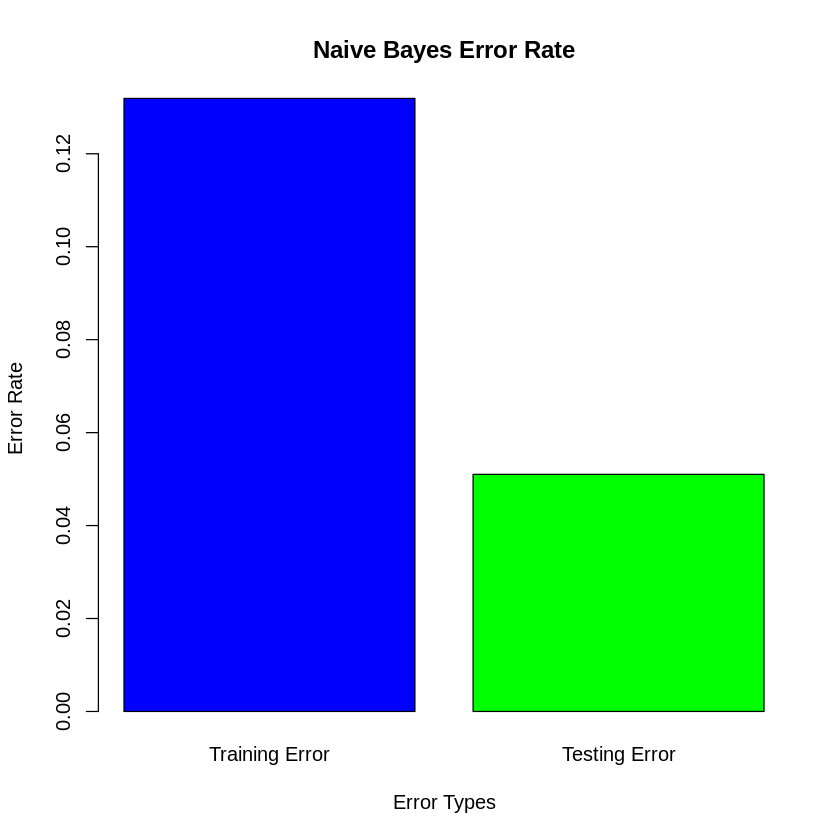

In [ ]:
#Setting the randomness
set.seed(123)

#The different splitting ratios for the dataset
#10 train : 90 test
#training_ratio <- createDataPartition(cleanpenguins$species, p=0.9, list=FALSE)

#20 train : 80 test
#training_ratio <- createDataPartition(cleanpenguins$species, p=0.8, list = FALSE)

#30 train : 70 test
training_ratio <- createDataPartition(cleanpenguins$species, p=0.7, list=FALSE)

#40 train : 60 test
#training_ratio <- createDataPartition(cleanpenguins$species, p=0.6, list=FALSE)

#50 train: 50 test
#training_ratio <- createDataPartition(cleanpenguins$species, p=0.5, list=FALSE)

#60 train: 40 test
#training_ratio <- createDataPartition(cleanpenguins$species, p=0.4, list = FALSE)

#70 train: 30 test
#training_ratio <- createDataPartition(cleanpenguins$species, p=0.3, list=FALSE)

#80 train : 20 test
#training_ratio <- createDataPartition(cleanpenguins$species, p=0.2, list=FALSE)

#90 train : 10 test
#training_ratio <- createDataPartition(cleanpenguins$species, p=0.1, list=FALSE)

#Training with dataset
features_train <- cleanpenguins[training_ratio, ]
#Testing with dataset_
features_test <- cleanpenguins[-training_ratio, ]

#Training with labels
labels_train <- features_train$species
#Testing with labels
labels_test <- features_test$species

#Normalising the features using scaling
#sapply method to ensure that the features are numeric values and are split properly
scale <- preProcess(features_train[, sapply(features_train, is.numeric)], method = c("center", "scale"))
features_train_scaled <- predict(scale, features_train[, sapply(features_train, is.numeric)])
features_test_scaled <- predict(scale, features_test[, sapply(features_test, is.numeric)])

#Perform PCA
pca_outcome <- prcomp(features_train_scaled, center = TRUE, scale. = TRUE)

#Collect the variance summary and cumulative variance (total variance)
variance_summary <- pca_outcome$sdev^2
variance_summary_ratio <- variance_summary / sum(variance_summary)
cumulative_variance <- cumsum(variance_summary_ratio)

#The number of principal components (PC's) to maintain (Based on Catell's Rule)
num_pcs_maintained <- 2

#New data frames to store the testing and training data for the selected PC's
features_train_pca <- as.data.frame(pca_outcome$x[, 1:num_pcs_maintained])
features_test_pca <- as.data.frame(predict(pca_outcome, newdata = features_test_scaled)[, 1:num_pcs_maintained])

#Initilise the score errors
training_error <- numeric()
testing_error <- numeric()

#Naive Bayes Model training
n_bayes <- naiveBayes(labels_train ~ ., data = features_train_pca)

#Determining the training error
naive_training <- predict(n_bayes, features_train_pca, type="class")

#Average training error
avg_train_error = mean(naive_training != labels_train)
#Storing the training error rate
training_error = c(training_error, avg_train_error)

#Determining the testing error
naive_testing <- predict(n_bayes, features_test_pca, type="class")

#Average testing error
avg_test_error = mean(naive_testing != labels_test)
#Storing the testing error rate
testing_error = c(testing_error, avg_test_error)

# Stores all the calculated error results
error_results <- data.frame(train_error = training_error, test_error = testing_error)

error_rates <- c(error_results$train_error, error_results$test_error)

error_types <- c("Training Error", "Testing Error")

barplot(error_rates, names.arg=error_types,
  xlab="Error Types", ylab="Error Rate",
  col=c("blue", "green"),
  main="Naive Bayes Error Rate")

**Confusion Matrix**

In [ ]:
#Confusion matrix
conf_matrix <- confusionMatrix(factor(naive_testing), factor(labels_test))
print(conf_matrix)

Confusion Matrix and Statistics

           Reference
Prediction  Adelie Chinstrap Gentoo
  Adelie        40         2      0
  Chinstrap      3        18      0
  Gentoo         0         0     35

Overall Statistics
                                          
               Accuracy : 0.949           
                 95% CI : (0.8849, 0.9832)
    No Information Rate : 0.4388          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9204          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: Adelie Class: Chinstrap Class: Gentoo
Sensitivity                 0.9302           0.9000        1.0000
Specificity                 0.9636           0.9615        1.0000
Pos Pred Value              0.9524           0.8571        1.0000
Neg Pred Value              0.9464           0.9740        1.0000
Prevalence                  0.4388        

**Precision, Recall, F1 Score**

In [ ]:
# Positive and negative metrics for evaluating prediction accuracy
#Getting the true positive, true negative, false positive, false negative from the confusion matrix
true_p <- conf_matrix$table[2, 2]
true_n <- conf_matrix$table[1, 1]
false_p <- conf_matrix$table[1, 2]
false_n <- conf_matrix$table[2, 1]

best_k_metrics(true_p, true_n, false_p, false_n)

Precision: 0.9 
Recall: 0.8571429 
F1 Score: 0.8780488 


**ROC curve and AUC**

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] "AUC: 0.992"


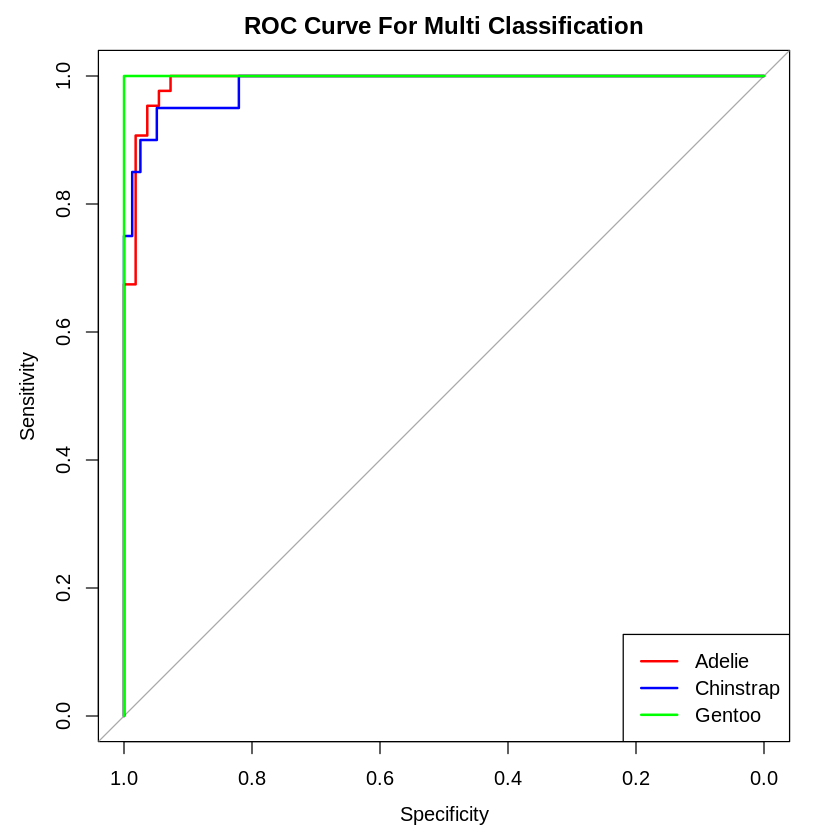

In [ ]:
#Predicted probablities for the positive classification
predicts <- predict(n_bayes, features_test_pca, type="raw")

#Stores all the probalities values based on how accurate the predictions are
probablities <- attr(predicts, "probabilities")

#Calculate ROC curve for multiclassification using the One Vs Rest (OvR) Approach
#Each classification is determined as a classification problem
#All of the AUC calculations for each ROC curve
ROC_curves <- list()
#All of the AUC calculations for each ROC curve
AUC_curves <- numeric(0)

for(class in levels(cleanpenguins$species)) {
  #Stores the classification labels
  class_labels <- as.numeric(labels_test == class)
  #Produces the ROC for each classification
  ROC_curve <- roc(class_labels, predicts[, class])
  #Saves the ROC into the ROC curves list
  ROC_curves[[class]] <- ROC_curve
  #Assigns a new AUC calulation to the array
  AUC_curves <- c(AUC_curves, ROC_curve$auc)
}

#Using Macro-averaging to determine the overall AUC performance
avg_auc <- round(mean(AUC_curves), 3)

#Visualising the ROC curve
plot(ROC_curves[[1]], col = "red", main = "ROC Curve For Multi Classification")
lines(ROC_curves[[2]], col = "blue")
lines(ROC_curves[[3]], col = "green")
legend("bottomright", legend = levels(cleanpenguins$species), col = c("red", "blue", "green"), lwd = 2)

#Outputting the AUC (Area Under Curve)
print(paste("AUC:", avg_auc))